# Oil Sector Analysis

## Group 4 Members: 
### Travis Guadamuz-Ruth, Shikha Patel, Ryodai Matsui, Hannah Whang, Elizabeth Di Scala,  Nicholas George,

## Project Report:

The oil industry has always been a topic of interest to many due to the very nature of its business: a commodity that virtually everyone must frequently purchase, either directly or indirectly, to conduct the vagaries of daily life.  Thus, what factors affect, drive, or influence the oil industry is more than a mere topic of curiosity, as any unexpected disruptions can carry far reaching effects for individuals, groups, countries, or even the world.  For this project, we delve into this topic during the COVID-19 pandemic to answer these questions.

•	How strong is the relationship between the prices of oil company shares and the price of crude oil?

•	Is there a relationship between the number of daily COVID-19 cases or deaths and the prices of crude oil or oil company equities?

•	If there is no significant relationship between COVID-19 numbers and these prices, is there one among other economic metrics in this study?

To this end, we focused our efforts on assembling a sample space sufficient to produce valid results.  Throughout this undertaking, it contracted markedly.  Our initial analysis period extended daily from January 1, 2020, to December 31, 2022, for 1,095 days.  Due to the New Year’s Day holiday precluding trading, the period shortened to 1,092 days ( January 2, 2020, to December 29, 2022).  A review of closing share price data through Yahoo Finance’s application programming interface (API) revealed that trading days do not include weekends, holidays, and other special days: this factor reduced the number of days to 755.  Moreover, an inspection of World Health Organization (WHO) API data disclosed that COVID-19 numbers did not begin until January 3, 2020, and daily numbers changed to weekly numbers after October 16, 2022. Understandably, these conditions reduced the number of samples to 702 ( January 3, 2020, to October 14, 2022).  Although difficult, these decisions were a trade-off between decreased validity from fewer sample points and increased integrity from compatible datasets.  We made the necessary choices to strike the best balance possible.

This inquiry continued with data collection.  The WHO’s API provided us with a full worldwide COVID-19 pandemic dataset, which we narrowed down to the appropriate country, features, and dates.  This data complemented the Yahoo Finance API download of daily prices for crude oil, the S&P 500, gold, and U.S. Treasury 10-Year Bond Yields.  For all that, after completing these tasks, we were faced with a dilemma: how to construct a benchmark to best characterize Oil Energy Sector equities.  To this end, our fundamental question in this matter became, “What most accurately expresses a company’s value,” and we found our solution through the Efficient Market Hypothesis, which states that share prices reflect all information; therefore, market capitalization, the product of a share price and the number of outstanding shares, should be the best way to establish a company’s value.

To find all publicly traded oil companies, a download of available tickers from Yahoo Finance ‘s API, over 11,000, began the process; a Python script then extracted only those tickers belonging to oil companies whose share trading began prior to the analysis period: the operation also included retrieving additional company information and calculating the maximum, mean, median, variance, standard deviation, and standard error of the mean (SEM) values for market capitalization.  

Side-by-side pie charts of the Oil Energy Sector breakdown by industry from number of companies, mean market capitalization, and median market capitalization imparted an insight.  Although the industry percentages were about the same for mean and median values, the industry, Oil & Gas Integrated, held the highest share for both while possessing the next to smallest number of companies.  Although ostensibly similar from these diagrams, the mean and median market capitalizations were actually not and required further investigation.

Statistical analyses of the mean and median market capitalizations by industry exhibit the same situation: significant margins between mean and median values, small and consistent standard deviations except for one industry, numerous outliers, and heavily left-skewed distributions.  Most notably, the difference between means and medians determined the next course of action.  Under normal circumstances, the mean best represents central tendency, but is sensitive to skewed data and extreme values.  With these conditions, the median becomes the more suitable measure and better summarizes the dataset.  Even in a mitigated situation, the median is preferred because data in practice tends to be more dynamic, and static observations may not be fully apprehensible.  As a result, we decided to use the median market capitalization in the modeling of Oil Energy Sector indices.  

To depict the Oil Energy Sector in equity markets, we created indices from two portfolios, one with all the oil companies and one with only the top six oil companies; each top company has the highest median market capitalization in one of six oil industries: ConocoPhillips (Oil & Gas E&P), Enbridge Inc. (Oil & Gas Midstream), Helmerich & Payne, Inc. (Oil & Gas Drilling), Marathon Petroleum Corporation (Oil & Gas Refining & Marketing), Schlumberger Limited (Oil & Gas Equipment & Services), and Exxon Mobil Corporation (Oil & Gas Integrated).  For these indices, we calculate an index weight for each oil company equal to that company’s median market capitalization divided by the total median market capitalization for the portfolio: a daily index price is the sum of each company’s share price times its index weight.  When evaluating the two indices, the top company index is slightly less correlated with the S&P 500 (0.579) compared with the all-company index (0.620).  Hence, this characteristic makes the top-company index preferable: in our opinion, this index with slightly less systematic risk and, correspondingly, slightly more portfolio risk is a better model for the oil industry.  Because of this discovery, the high correlation between the two indices (0.996/0.976) and the reduced computational labor, we chose to use the top company index, Oil Energy Sector (Top) Index, as opposed to the all-company index, Oil Energy Sector (All) Index.

In conclusion, this analysis provides nuanced answers to our questions.  From the numbers themselves, the relationship between the prices of oil company shares and the price of crude oil remains strong at a 0.929 correlation.  Not only is there no relationship between COVID-19 numbers and those from the oil industry, but also there is no relationship between COVID-19 numbers and any other point of reference in this study.  Despite this occurrence, these metrics, especially crude oil, suffered an immediate but temporary drop in prices at the pandemic’s onset in March 2020.  On top of that, the only strong relationship outside those within the oil industry and among COVID-19 numbers is between crude oil prices and 10-Year Bond Yields with a 0.838 correlation; the economic indicator that remains most insulated from any effects is gold.  What’s more, the analysis of percent changes in numbers produces relatively different results: in this case, there are no significant correlations between any metrics, but, by and large, all the economic benchmarks suffered a substantial increase in volatility at the pandemic’s onset followed by lower but increased volatility, except for crude oil prices where normal volatility followed the sudden volatility.  Altogether, the uncertainty created by the unexpected appearance of the COVID-19 pandemic caused a precipitous drop in prices and a sudden and substantial increase in volatility followed by lower but increased volatility, yet the levels and changes in COVID-19 numbers had no discernable effect on the price levels or percent changes.

In [1]:
 #*******************************************************************************************
 #
 #  File Name:  PyOilSectorAnalysis.ipynb 
 #
 #  File Description:
 #      This interactive Python notebook, PyOilSectorAnalysis.ipynb, uses this Jupyter
 #      Notebook and accompanying Python Scripts to analyze the relationship among various
 #      economic indicators, the oil industry, and COVID-19 numbers.  The application 
 #      programming interfaces for this Jupyter Notebook require the folowing commands 
 #      to install:
 #
 #      pip install yahoo_fin
 #      pip install yfinance
 #      pip install requests_html 
 #      conda install -c pyviz geoviews
 #      pip install geoviews
 #      
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/12/2023      Initial Development                     Group #4 Team
 #
 #******************************************************************************************/

import PyConstants as constant
import PyFunctions as function
import PyConstants as log_constant
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubroutines as subroutine

import PyOilSectorAnalysisConstants as local_constant
import PyOilSectorAnalysisFunctions as local_function
import PyOilSectorAnalysisAPIFunctions as api_function

import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt

import os

from io import StringIO 

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'PyOilSectorAnalysis.ipynb'

log_subroutine \
    .SetLogMode \
        (True)

log_subroutine \
    .SetDebugMode \
        (True)

log_subroutine \
    .SetImageMode \
        (True)

log_subroutine \
    .BeginProgramExecution \
        ('PyOilSectorAnalysis')

The program created directory, ./Resources.

The program created directory, ./Logs.

The program created directory, ./Images.

Program execution begins...



# <br> **Part 1: Data Acquisition and Preparation**

## **Section 1.1: Oil Prices, S&P 500, An Other Economic Data**

### **Economic Indicators**

In [3]:
# This function returns the trading prices for crude oil during the analysis period.
crudeOilPricesSeries \
    = api_function \
        .ReturnTradingPricesAsSeries \
            (local_constant.CRUDE_OIL_YAHOO_TICKER)


log_function \
    .DebugReturnObjectWriteObject \
        (crudeOilPricesSeries)

Date
2020-01-03 00:00:00-05:00    63.049999
2020-01-06 00:00:00-05:00    63.270000
2020-01-07 00:00:00-05:00    62.700001
2020-01-08 00:00:00-05:00    59.610001
2020-01-09 00:00:00-05:00    59.560001
                               ...    
2022-10-10 00:00:00-04:00    91.129997
2022-10-11 00:00:00-04:00    89.349998
2022-10-12 00:00:00-04:00    87.269997
2022-10-13 00:00:00-04:00    89.110001
2022-10-14 00:00:00-04:00    85.610001
Name: Close, Length: 702, dtype: float64

In [4]:
# This function returns the trading prices for the S&P 500 during the analysis period.
sp500PricesSeries \
    = api_function \
        .ReturnTradingPricesAsSeries \
            (local_constant.SP_500_YAHOO_TICKER)


log_function \
    .DebugReturnObjectWriteObject \
        (sp500PricesSeries)

Date
2020-01-03 00:00:00-05:00    3234.850098
2020-01-06 00:00:00-05:00    3246.280029
2020-01-07 00:00:00-05:00    3237.179932
2020-01-08 00:00:00-05:00    3253.050049
2020-01-09 00:00:00-05:00    3274.699951
                                ...     
2022-10-10 00:00:00-04:00    3612.389893
2022-10-11 00:00:00-04:00    3588.840088
2022-10-12 00:00:00-04:00    3577.030029
2022-10-13 00:00:00-04:00    3669.909912
2022-10-14 00:00:00-04:00    3583.070068
Name: Close, Length: 702, dtype: float64

In [5]:
# This function returns the trading prices for gold during the analysis period.
goldPricesSeries \
    = api_function \
        .ReturnTradingPricesAsSeries \
            (local_constant.GOLD_YAHOO_TICKER)


log_function \
    .DebugReturnObjectWriteObject \
        (goldPricesSeries)

Date
2020-01-03 00:00:00-05:00    1549.199951
2020-01-06 00:00:00-05:00    1566.199951
2020-01-07 00:00:00-05:00    1571.800049
2020-01-08 00:00:00-05:00    1557.400024
2020-01-09 00:00:00-05:00    1551.699951
                                ...     
2022-10-10 00:00:00-04:00    1667.300049
2022-10-11 00:00:00-04:00    1678.699951
2022-10-12 00:00:00-04:00    1670.300049
2022-10-13 00:00:00-04:00    1670.000000
2022-10-14 00:00:00-04:00    1641.699951
Name: Close, Length: 702, dtype: float64

In [6]:
# This function returns the trading prices for U.S. 10-year Treasury Bonds during 
# the analysis period.
tenYearBondYieldPricesSeries \
    = api_function \
        .ReturnTradingPricesAsSeries \
            (local_constant.TEN_YEAR_BOND_YIELD_YAHOO_TICKER)


log_function \
    .DebugReturnObjectWriteObject \
        (tenYearBondYieldPricesSeries)

Date
2020-01-03 00:00:00-05:00    1.788
2020-01-06 00:00:00-05:00    1.811
2020-01-07 00:00:00-05:00    1.827
2020-01-08 00:00:00-05:00    1.874
2020-01-09 00:00:00-05:00    1.858
                             ...  
2022-10-10 00:00:00-04:00    3.888
2022-10-11 00:00:00-04:00    3.939
2022-10-12 00:00:00-04:00    3.902
2022-10-13 00:00:00-04:00    3.952
2022-10-14 00:00:00-04:00    4.010
Name: Close, Length: 702, dtype: float64

### **Economic Indicator DataFrame**

In [7]:
# This function takes the timstamp indexes transfers them to a Series, then converts 
# the values into Date objects.
priceTradingDateSeries \
    = function \
        .ConvertSeriesTimestampIndexesToDateObjects \
            (tenYearBondYieldPricesSeries)

In [8]:
# This line of code creates a DataFrame from the economic indicator Series.
economicIndicatorDataFrame \
    = pd \
        .DataFrame({
            'Date':
                priceTradingDateSeries,
            'Crude Oil':
                crudeOilPricesSeries,
            'S&P 500':
                sp500PricesSeries,
            'Gold':
                goldPricesSeries,
            '10-Year Bond Yield':
                tenYearBondYieldPricesSeries})


# This line of code makes the column 'Date' column the new index column 
# then drops it.
economicIndicatorDataFrame \
    .set_index \
        ('Date', 
         drop \
             = True, 
         append \
             = False, 
         inplace \
             = True, 
         verify_integrity \
             = False)


log_function \
    .DebugReturnObjectWriteObject \
        (economicIndicatorDataFrame)

,Crude Oil,S&P 500,Gold,10-Year Bond Yield
Date,,,,
2020-01-03,63.049999,3234.850098,1549.199951,1.788
2020-01-06,63.270000,3246.280029,1566.199951,1.811
2020-01-07,62.700001,3237.179932,1571.800049,1.827
2020-01-08,59.610001,3253.050049,1557.400024,1.874
2020-01-09,59.560001,3274.699951,1551.699951,1.858
...,...,...,...,...
2022-10-10,91.129997,3612.389893,1667.300049,3.888
2022-10-11,89.349998,3588.840088,1678.699951,3.939
2022-10-12,87.269997,3577.030029,1670.300049,3.902


### **Display Economic Indicator Prices**

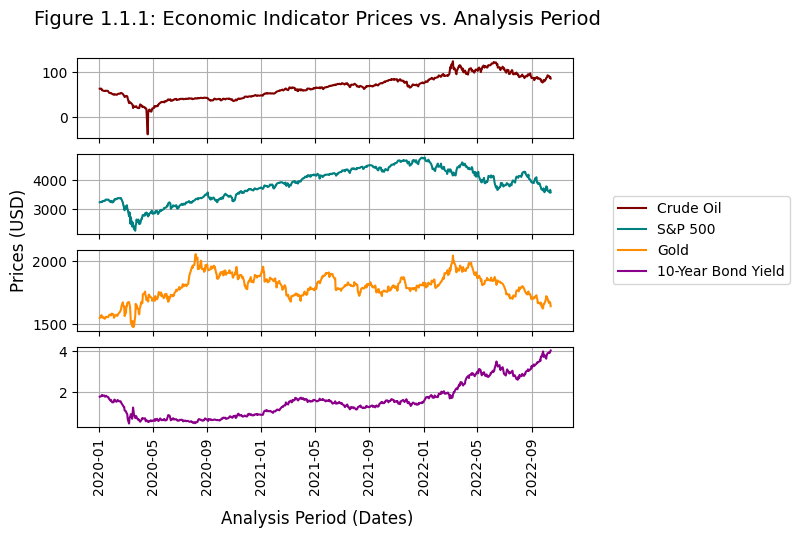

In [9]:
colorList \
    = ['maroon',
       'teal',
       'darkorange',
       'darkmagenta']

frameDictionary \
        = {'Crude Oil': 
                economicIndicatorDataFrame \
                   ['Crude Oil'], 
           'S&P 500': 
                economicIndicatorDataFrame \
                   ['S&P 500'],
           'Gold': 
                economicIndicatorDataFrame \
                   ['Gold'],
           '10-Year Bond Yield':
                economicIndicatorDataFrame \
                   ['10-Year Bond Yield']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 1.1.1: Economic Indicator Prices vs. Analysis Period',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD)',
         None, '',
         -0.1, 0.02,
         True,
         1.25, 0.5)

In [10]:
local_function \
    .ReturnEconomicIndicatorPricesStandardFormat \
        (economicIndicatorDataFrame.head(10), 
         "Table 1.1.1: Economic Indicator Prices")

,Crude Oil,S&P 500,Gold,10-Year Bond Yield
2020-01-03,$63.05,"$3,234.85","$1,549.20",1.79%
2020-01-06,$63.27,"$3,246.28","$1,566.20",1.81%
2020-01-07,$62.70,"$3,237.18","$1,571.80",1.83%
2020-01-08,$59.61,"$3,253.05","$1,557.40",1.87%
2020-01-09,$59.56,"$3,274.70","$1,551.70",1.86%
2020-01-10,$59.04,"$3,265.35","$1,557.50",1.83%
2020-01-13,$58.08,"$3,288.13","$1,548.40",1.85%
2020-01-14,$58.23,"$3,283.15","$1,542.40",1.82%
2020-01-15,$57.81,"$3,289.29","$1,552.10",1.79%
2020-01-16,$58.52,"$3,316.81","$1,549.00",1.81%


In [11]:
function \
    .ReturnCorrelationTableStandardFormat \
        (economicIndicatorDataFrame,
         'Table 1.1.2: Economic Indicator Prices Correlation Matrix')

,Crude Oil,S&P 500,Gold,10-Year Bond Yield
Crude Oil,1.000000,0.725930,0.214008,0.838056
S&P 500,0.725930,1.000000,0.358431,0.423460
Gold,0.214008,0.358431,1.000000,-0.106595
10-Year Bond Yield,0.838056,0.423460,-0.106595,1.000000


### **Economic Indicator Price Changes (%)**

In [12]:
# This function returns the percent change in prices for crude oil 
# during the analysis period.
crudeOilPricesPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (crudeOilPricesSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (crudeOilPricesPercentChangeSeries)

Date
2020-01-06 00:00:00-05:00    0.348931
2020-01-07 00:00:00-05:00   -0.900900
2020-01-08 00:00:00-05:00   -4.928230
2020-01-09 00:00:00-05:00   -0.083877
2020-01-10 00:00:00-05:00   -0.873070
                               ...   
2022-10-10 00:00:00-04:00   -1.629968
2022-10-11 00:00:00-04:00   -1.953252
2022-10-12 00:00:00-04:00   -2.327926
2022-10-13 00:00:00-04:00    2.108404
2022-10-14 00:00:00-04:00   -3.927730
Name: Close, Length: 701, dtype: float64

In [13]:
# This function returns the percent change in prices for the S&P 500
# during the analysis period.
sp500PricesPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (sp500PricesSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (sp500PricesPercentChangeSeries)

Date
2020-01-06 00:00:00-05:00    0.353337
2020-01-07 00:00:00-05:00   -0.280324
2020-01-08 00:00:00-05:00    0.490245
2020-01-09 00:00:00-05:00    0.665526
2020-01-10 00:00:00-05:00   -0.285518
                               ...   
2022-10-10 00:00:00-04:00   -0.749246
2022-10-11 00:00:00-04:00   -0.651918
2022-10-12 00:00:00-04:00   -0.329077
2022-10-13 00:00:00-04:00    2.596564
2022-10-14 00:00:00-04:00   -2.366266
Name: Close, Length: 701, dtype: float64

In [14]:
# This function returns the percent change in prices for gold
# during the analysis period.
goldPricesPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (goldPricesSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (goldPricesPercentChangeSeries)

Date
2020-01-06 00:00:00-05:00    1.097341
2020-01-07 00:00:00-05:00    0.357560
2020-01-08 00:00:00-05:00   -0.916149
2020-01-09 00:00:00-05:00   -0.365999
2020-01-10 00:00:00-05:00    0.373787
                               ...   
2022-10-10 00:00:00-04:00   -1.952364
2022-10-11 00:00:00-04:00    0.683734
2022-10-12 00:00:00-04:00   -0.500381
2022-10-13 00:00:00-04:00   -0.017964
2022-10-14 00:00:00-04:00   -1.694614
Name: Close, Length: 701, dtype: float64

In [15]:
# This function returns the percent change in prices for U.S
# 10-year Treasury Bonds during the analysis period.
tenYearBondYieldPricesPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (tenYearBondYieldPricesSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (tenYearBondYieldPricesPercentChangeSeries)

Date
2020-01-06 00:00:00-05:00    1.286354
2020-01-07 00:00:00-05:00    0.883492
2020-01-08 00:00:00-05:00    2.572519
2020-01-09 00:00:00-05:00   -0.853784
2020-01-10 00:00:00-05:00   -1.776103
                               ...   
2022-10-10 00:00:00-04:00    0.128769
2022-10-11 00:00:00-04:00    1.311725
2022-10-12 00:00:00-04:00   -0.939323
2022-10-13 00:00:00-04:00    1.281393
2022-10-14 00:00:00-04:00    1.467620
Name: Close, Length: 701, dtype: float64

### **Economic Indicator Price Changes (%) DataFrame**

In [16]:
# This function takes the Date object Series for the  prices, drops
# the first row, and assigns the result to the Date object Series 
# for percent change.
percentChangeTradingDateSeries \
    = priceTradingDateSeries \
        .drop \
            (priceTradingDateSeries \
                .index \
                    [0], 
             inplace \
                = False)

In [17]:
# This line of code creates a DataFrame from the percent change economic 
# indicator Series.
economicIndicatorPercentChangeDataFrame \
    = pd \
        .DataFrame({
            'Date':
                percentChangeTradingDateSeries,
            'Crude Oil (% Change)':
                crudeOilPricesPercentChangeSeries,
            'S&P 500 (% Change)':
                sp500PricesPercentChangeSeries,
            'Gold (% Change)':
                goldPricesPercentChangeSeries,
            '10-Year Bond Yield (% Change)':
                tenYearBondYieldPricesPercentChangeSeries})


# This line of code makes the column 'Date' column the new index column 
# then drops it.
economicIndicatorPercentChangeDataFrame \
    .set_index \
        ('Date', 
         drop \
             = True, 
         append \
             = False, 
         inplace \
             = True, 
         verify_integrity \
             = False)


log_function \
    .DebugReturnObjectWriteObject \
        (economicIndicatorPercentChangeDataFrame)

,Crude Oil (% Change),S&P 500 (% Change),Gold (% Change),10-Year Bond Yield (% Change)
Date,,,,
2020-01-06,0.348931,0.353337,1.097341,1.286354
2020-01-07,-0.900900,-0.280324,0.357560,0.883492
2020-01-08,-4.928230,0.490245,-0.916149,2.572519
2020-01-09,-0.083877,0.665526,-0.365999,-0.853784
2020-01-10,-0.873070,-0.285518,0.373787,-1.776103
...,...,...,...,...
2022-10-10,-1.629968,-0.749246,-1.952364,0.128769
2022-10-11,-1.953252,-0.651918,0.683734,1.311725
2022-10-12,-2.327926,-0.329077,-0.500381,-0.939323


### **Display Economic Indicator Price Changes (%)**

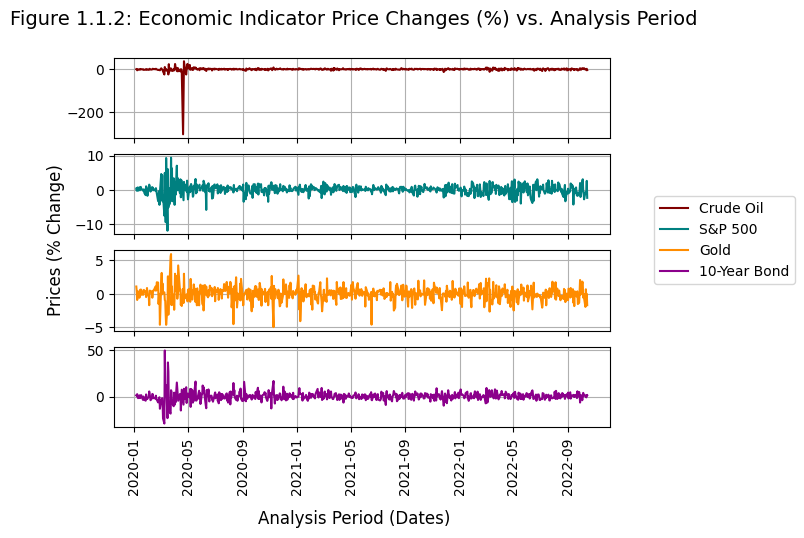

In [18]:
frameDictionary \
        = {'Crude Oil': 
                economicIndicatorPercentChangeDataFrame \
                   ['Crude Oil (% Change)'], 
           'S&P 500': 
                economicIndicatorPercentChangeDataFrame \
                   ['S&P 500 (% Change)'],
           'Gold': 
                economicIndicatorPercentChangeDataFrame \
                   ['Gold (% Change)'],
           '10-Year Bond':
                economicIndicatorPercentChangeDataFrame \
                   ['10-Year Bond Yield (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 1.1.2: Economic Indicator Price Changes (%) vs. Analysis Period',
         colorList,
         'Analysis Period (Dates)',
         'Prices (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.20, 0.5)

In [19]:
function \
    .ReturnStylerObjectPercentChangeStandardFormat \
        (economicIndicatorPercentChangeDataFrame, 
         "Table 1.1.3: Economic Indicator Prices (% Change)")

,Crude Oil (% Change),S&P 500 (% Change),Gold (% Change),10-Year Bond Yield (% Change)
2020-01-06,0.35%,0.35%,1.10%,1.29%
2020-01-07,-0.90%,-0.28%,0.36%,0.88%
2020-01-08,-4.93%,0.49%,-0.92%,2.57%
2020-01-09,-0.08%,0.67%,-0.37%,-0.85%
2020-01-10,-0.87%,-0.29%,0.37%,-1.78%
2020-01-13,-1.63%,0.70%,-0.58%,1.26%
2020-01-14,0.26%,-0.15%,-0.39%,-1.62%
2020-01-15,-0.72%,0.19%,0.63%,-1.65%
2020-01-16,1.23%,0.84%,-0.20%,1.17%
2020-01-17,0.03%,0.39%,0.63%,1.49%


In [20]:
function \
    .ReturnCorrelationTableStandardFormat \
        (economicIndicatorPercentChangeDataFrame,
         'Table 1.1.4: Economic Indicator Prices (% Change) Correlation Matrix')

,Crude Oil (% Change),S&P 500 (% Change),Gold (% Change),10-Year Bond Yield (% Change)
Crude Oil (% Change),1.000000,0.138933,0.043983,0.095784
S&P 500 (% Change),0.138933,1.000000,0.124233,0.314173
Gold (% Change),0.043983,0.124233,1.000000,-0.206705
10-Year Bond Yield (% Change),0.095784,0.314173,-0.206705,1.000000


## **Section 1.2: COVID-19 Data**

### **New COVID-19 Cases and Death Counts (All Countries)**

In [21]:
# This function uses the WHO api to retrieve all COVID-19 data and assigns
# it to a DataFrame.
allCountriesCOVID19InfoDataFrame \
    = api_function \
        .ReturnAllCovidDataFromWHO()


log_function \
    .DebugReturnObjectWriteObject \
        (allCountriesCOVID19InfoDataFrame)

,Date Reported,Country Code,Country,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
314968,2023-08-19,ZW,Zimbabwe,AFRO,0,265716,0,5713
314969,2023-08-20,ZW,Zimbabwe,AFRO,0,265716,0,5713
314970,2023-08-21,ZW,Zimbabwe,AFRO,0,265716,0,5713
314971,2023-08-22,ZW,Zimbabwe,AFRO,0,265716,0,5713


### **New COVID-19 Cases and Death Counts (USA)**

In [22]:
# This function takes the WHO data for all countries, retrieves only those
# rows for the United States, and assigns them to a DataFrame.
covidNumbersDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (allCountriesCOVID19InfoDataFrame,
             'Country Code',
             ['US'])
 

log_function \
    .DebugReturnObjectWriteObject \
        (covidNumbersDataFrame)

,Date Reported,Country Code,Country,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
300354,2020-01-03,US,United States of America,AMRO,0,0,0,0
300355,2020-01-04,US,United States of America,AMRO,0,0,0,0
300356,2020-01-05,US,United States of America,AMRO,0,0,0,0
300357,2020-01-06,US,United States of America,AMRO,0,0,0,0
300358,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
301678,2023-08-19,US,United States of America,AMRO,0,103436829,0,1127152
301679,2023-08-20,US,United States of America,AMRO,0,103436829,0,1127152
301680,2023-08-21,US,United States of America,AMRO,0,103436829,0,1127152
301681,2023-08-22,US,United States of America,AMRO,0,103436829,0,1127152


### **New COVID-19 Cases and Death Counts (USA) Only on Equity Trading Days**

In [23]:
# This function converts the column with the date Strings into a column with 
# equivalent Date objects.
covidNumbersDataFrame['Date Reported'] \
    = function \
        .ConvertSeriesFromDateStringsToDateObjects \
            (covidNumbersDataFrame \
                ['Date Reported'],
             '%Y-%m-%d')


log_function \
    .DebugReturnObjectWriteObject \
        (covidNumbersDataFrame \
             ['Date Reported'])

300354    2020-01-03
300355    2020-01-04
300356    2020-01-05
300357    2020-01-06
300358    2020-01-07
             ...    
301678    2023-08-19
301679    2023-08-20
301680    2023-08-21
301681    2023-08-22
301682    2023-08-23
Name: Date Reported, Length: 1329, dtype: object

In [24]:
# This function extracts only those rows from the USA COVID-19 dataset that
# fall on trading days in the analysis period and assigns it to a new
# 'clean' DataFrame.
covidNumbersDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (covidNumbersDataFrame,
             'Date Reported',
             priceTradingDateSeries \
                .tolist())


# This line of code makes the column 'Date' column the new index column 
# then drops it.
covidNumbersDataFrame \
    .set_index \
        ('Date Reported', 
         drop \
             = True, 
         append \
             = False, 
         inplace \
             = True, 
         verify_integrity \
             = False)


log_function \
    .DebugReturnObjectWriteObject \
        (covidNumbersDataFrame)

,Country Code,Country,WHO Region,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
Date Reported,,,,,,,
2020-01-03,US,United States of America,AMRO,0,0,0,0
2020-01-06,US,United States of America,AMRO,0,0,0,0
2020-01-07,US,United States of America,AMRO,0,0,0,0
2020-01-08,US,United States of America,AMRO,0,0,0,0
2020-01-09,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...
2022-10-10,US,United States of America,AMRO,11333,95396455,72,1051681
2022-10-11,US,United States of America,AMRO,13220,95409675,78,1051759
2022-10-12,US,United States of America,AMRO,24419,95434094,169,1051928


### **Drop Extraneous Columns from COVID-19 Dataset**

In [25]:
# This line of code drops extraneous columns from the cleaned COVID-19 dataset.
covidNumbersDataFrame \
    .drop \
        (['Country Code', 
          'Country', 
          'WHO Region',
          'Cumulative Cases',
          'Cumulative Deaths'], 
         axis \
             = 1, 
         inplace \
             = True)


# This line of code ensures there are no negative values in the column, New Cases.
covidNumbersDataFrame['New Cases'] \
    = covidNumbersDataFrame \
                .apply \
                    (lambda x: abs(x['New Cases']), 
                     axis = 1)


# This line of code ensures there are no negative values in the column, New Deaths.
covidNumbersDataFrame['New Deaths'] \
    = covidNumbersDataFrame \
                .apply \
                    (lambda x: abs(x['New Deaths']), 
                     axis = 1)

### **Display COVID-19 Dataset**

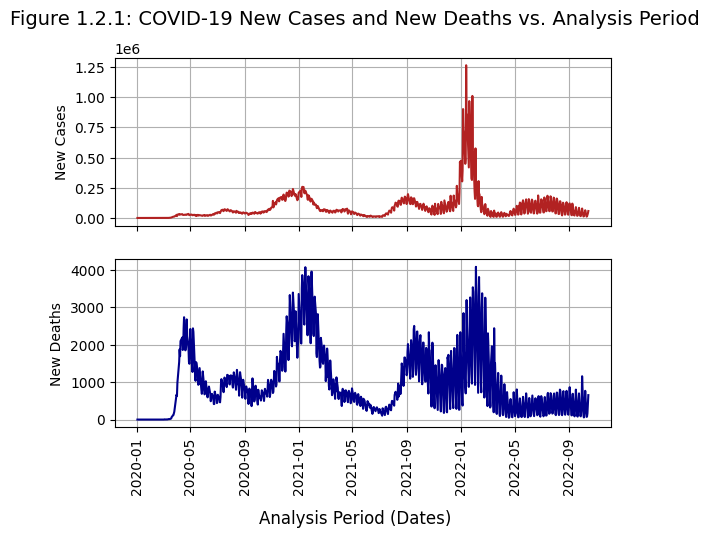

In [26]:
colorList \
    = ['firebrick',
       'darkblue']

frameDictionary \
        = {'New Cases': 
                covidNumbersDataFrame \
                   ['New Cases'], 
           'New Deaths': 
                covidNumbersDataFrame \
                   ['New Deaths']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 1.2.1: COVID-19 New Cases and New Deaths vs. Analysis Period',
         colorList,
         'Analysis Period (Dates)',
         None, 
         None, None,
        -0.1)

In [27]:
local_function \
    .ReturnStylerObjectCOVIDStandardFormat \
        (covidNumbersDataFrame,
         'Table 1.2.1: COVID-19 Cases and Deaths During Analysis Period')

,New Cases,New Deaths
2020-01-03,0,0
2020-01-06,0,0
2020-01-07,0,0
2020-01-08,0,0
2020-01-09,0,0
2020-01-10,0,0
2020-01-13,0,0
2020-01-14,0,0
2020-01-15,0,0
2020-01-16,0,0


r-value:     0.5010
r-squared:   0.2510


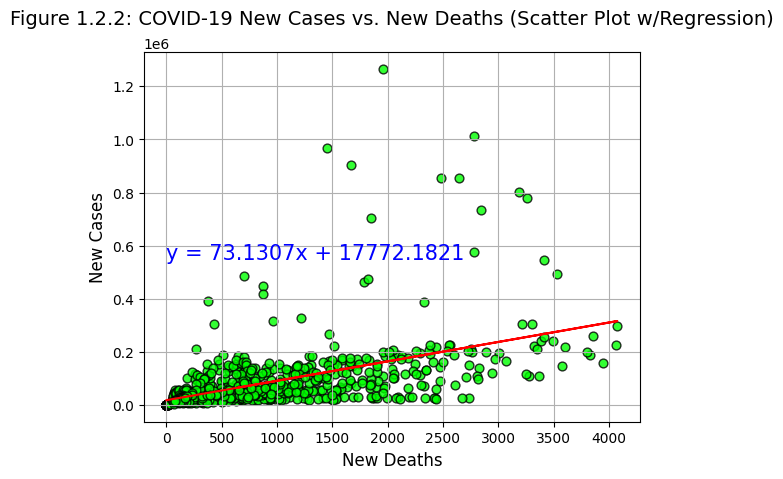

In [28]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (covidNumbersDataFrame \
             ['New Deaths'],
         covidNumbersDataFrame \
             ['New Cases'],
         'Figure 1.2.2: COVID-19 New Cases vs. New Deaths (Scatter Plot w/Regression)', 
         1, 0.0, 550000.0)

### **Percent Change in COVID-19 Numbers**

In [29]:
# This function returns the percent change in new COVID-19 cases
# during the analysis period.
covidNewCasesPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (covidNumbersDataFrame \
                 ['New Cases'])


log_function \
    .DebugReturnObjectWriteObject \
        (covidNewCasesPercentChangeSeries)

Date Reported
2020-01-06     0.000000
2020-01-07     0.000000
2020-01-08     0.000000
2020-01-09     0.000000
2020-01-10     0.000000
                ...    
2022-10-10   -82.345427
2022-10-11    16.650490
2022-10-12    84.712557
2022-10-13    56.255375
2022-10-14    50.602789
Name: New Cases, Length: 701, dtype: float64

In [30]:
# This function returns the percent change in new COVID-19 deaths
# during the analysis period.
covidDeathsPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (covidNumbersDataFrame \
                ['New Deaths'])


log_function \
    .DebugReturnObjectWriteObject \
        (covidDeathsPercentChangeSeries)

Date Reported
2020-01-06      0.000000
2020-01-07      0.000000
2020-01-08      0.000000
2020-01-09      0.000000
2020-01-10      0.000000
                 ...    
2022-10-10    -90.612777
2022-10-11      8.333333
2022-10-12    116.666667
2022-10-13    135.502959
2022-10-14     63.819095
Name: New Deaths, Length: 701, dtype: float64

### **Percent Change in COVID-19 Numbers DataFrame**

In [31]:
# This line of code creates a DataFrame from the percent change in COVID-19 numbers Series.
covidNumbersPercentChangeDataFrame \
    = pd \
        .DataFrame({
            'New Cases (% Change)':
                covidNewCasesPercentChangeSeries,
            'New Deaths (% Change)':
                covidDeathsPercentChangeSeries})


log_function \
    .DebugReturnObjectWriteObject \
        (covidNumbersPercentChangeDataFrame)

,New Cases (% Change),New Deaths (% Change)
Date Reported,,
2020-01-06,0.000000,0.000000
2020-01-07,0.000000,0.000000
2020-01-08,0.000000,0.000000
2020-01-09,0.000000,0.000000
2020-01-10,0.000000,0.000000
...,...,...
2022-10-10,-82.345427,-90.612777
2022-10-11,16.650490,8.333333
2022-10-12,84.712557,116.666667


### **Display COVID-19 Dataset**

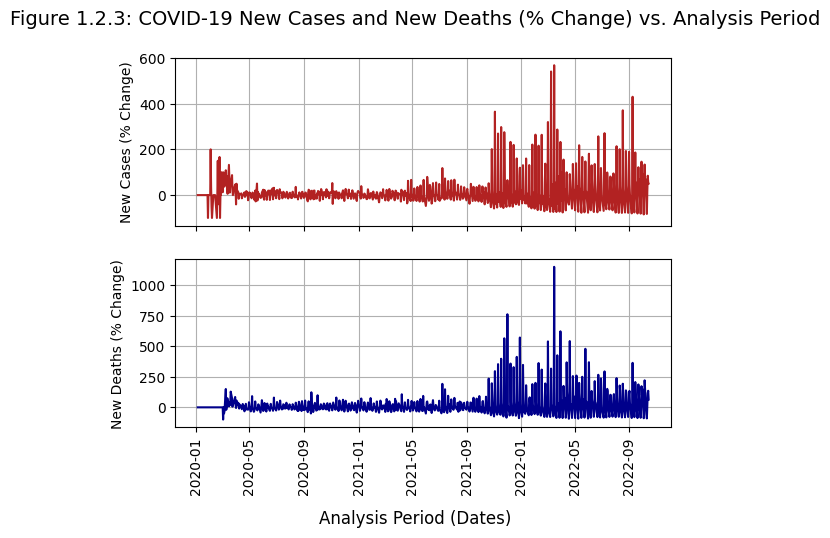

In [32]:
frameDictionary \
        = {'New Cases (% Change)': 
                covidNumbersPercentChangeDataFrame \
                   ['New Cases (% Change)'], 
           'New Deaths (% Change)': 
                covidNumbersPercentChangeDataFrame \
                   ['New Deaths (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 1.2.3: COVID-19 New Cases and New Deaths (% Change) vs. Analysis Period',
         colorList,
         'Analysis Period (Dates)',
         None,
         None, None,
        -0.1)

In [33]:
function \
    .ReturnStylerObjectPercentChangeStandardFormat \
        (covidNumbersPercentChangeDataFrame, 
         'Table 1.2.2: COVID-19 New Cases and New Deaths (% Change)')

,New Cases (% Change),New Deaths (% Change)
2020-01-06,0.00%,0.00%
2020-01-07,0.00%,0.00%
2020-01-08,0.00%,0.00%
2020-01-09,0.00%,0.00%
2020-01-10,0.00%,0.00%
2020-01-13,0.00%,0.00%
2020-01-14,0.00%,0.00%
2020-01-15,0.00%,0.00%
2020-01-16,0.00%,0.00%
2020-01-17,0.00%,0.00%


r-value:     0.7840
r-squared:   0.6146


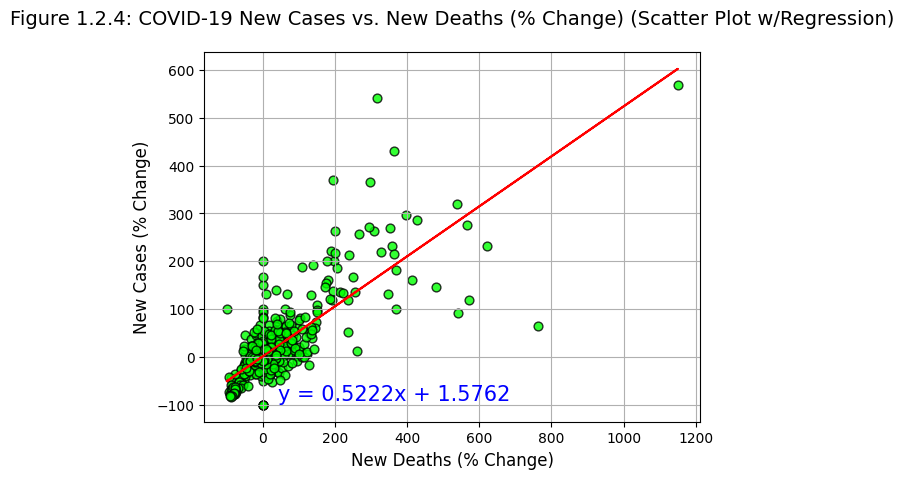

In [34]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (covidNumbersPercentChangeDataFrame \
         ['New Deaths (% Change)'],
     covidNumbersPercentChangeDataFrame \
         ['New Cases (% Change)'],
     'Figure 1.2.4: COVID-19 New Cases vs. New Deaths (% Change) (Scatter Plot w/Regression)', 
     1, 41.0, -90.0)

## **Section 1.3: Oil Energy Sector Company List**

### **Yahoo Finance API Full Ticker Download**

In [35]:
# This function returns all tickers from Yahoo Finance's database.
completeYahooFinanceTickerList \
    = api_function \
        .ReturnCompleteTickerListFromYahooFinance()

In [36]:
log_subroutine \
    .PrintAndLogWriteText \
        ('There are {:,} tickers in the complete Yahoo Finance ticker List.' \
            .format(len(completeYahooFinanceTickerList)))

There are 11,304 tickers in the complete Yahoo Finance ticker List.


### Oil Energy Sector Company Data Acquisition

In [ ]:
# These lines of code either generate an oil company csv file or read from it 
# to create a oil company DataFrame.
doesExistFlagBooleanVariable \
    = os \
        .path \
            .exists \
                (local_constant.ALL_OIL_COMPANIES_FILE_PATH)


if not doesExistFlagBooleanVariable:
                 
    # These lines of code use the Yahoo Finance API to sort through over 11,000 tickers
    # to find those oil companies that meet certain criteria: associated with one of six
    # oil industries, IPO was at or before first day of analysis period, and daily
    # outstanding shares, daily closing stock prices, company name, industry name, 
    # address, and gross profit are all present. The process takes about an hour to 
    # complete.
    oilCompanyDataFrame \
        = api_function \
            .ReturnOilEnergySectorCompanies \
                (completeYahooFinanceTickerList)

    # This line of code takes a precaution by removing any rows with n/a values.
    oilCompanyDataFrame \
        .dropna \
            (inplace \
                = True)

    # This line of code resets the index if the program removes any rows.
    oilCompanyDataFrame \
        .reset_index \
            (drop \
                = True, 
             inplace \
                = True)

    # This line of code writes the data to a csv file for future use.
    subroutine \
        .WriteDataFrameToCSVFile \
            (oilCompanyDataFrame,
             local_constant.ALL_OIL_COMPANIES_FILE_PATH,
             'Company ID')
    
else:
                 
    oilCompanyDataFrame \
        = function \
            .ReturnCSVFileAsDataFrame \
                (local_constant.ALL_OIL_COMPANIES_FILE_PATH, 
                 'Company ID')

    
log_function \
    .DebugReturnObjectWriteObject \
        (oilCompanyDataFrame)


Begin retrieving oil company information...


Trading for the ticker, AAA, begins after the first day of the analysis period.

This ticker, AAAU, does not have the required information.  Skipping...

Trading for the ticker, AAC, begins after the first day of the analysis period.

This ticker, AAC.U, does not have the required information.  Skipping...

This ticker, AAC.W, does not have the required information.  Skipping...

Trading for the ticker, AACI, begins after the first day of the analysis period.

Trading for the ticker, AACIU, begins after the first day of the analysis period.

This ticker, AACIW, does not have the required information.  Skipping...

Trading for the ticker, AACT, begins after the first day of the analysis period.

This ticker, AACT.U, does not have the required information.  Skipping...

This ticker, AACT.W, does not have the required information.  Skipping...

This ticker, AADR, does not have the required information.  Skipping...

This ticker, AAIC$B, does 

This ticker, ADSEW, does not have the required information.  Skipping...

Trading for the ticker, ADTH, begins after the first day of the analysis period.

This ticker, ADTHW, does not have the required information.  Skipping...

Trading for the ticker, ADTX, begins after the first day of the analysis period.

This ticker, ADVWW, does not have the required information.  Skipping...

Trading for the ticker, ADXN, begins after the first day of the analysis period.


Retrieved information for AE in the Oil & Gas Refining & Marketing industry.


Trading for the ticker, AEAE, begins after the first day of the analysis period.

Trading for the ticker, AEAEU, begins after the first day of the analysis period.

This ticker, AEAEW, does not have the required information.  Skipping...

This ticker, AEFC, does not have the required information.  Skipping...

Trading for the ticker, AEI, begins after the first day of the analysis period.

This ticker, AEL$A, does not have the required information.

This ticker, AJXA, does not have the required information.  Skipping...

Trading for the ticker, AKA, begins after the first day of the analysis period.

Trading for the ticker, AKAN, begins after the first day of the analysis period.

Trading for the ticker, AKLI, begins after the first day of the analysis period.

This ticker, AKO.A, does not have the required information.  Skipping...

This ticker, AKO.B, does not have the required information.  Skipping...

Trading for the ticker, AKU, begins after the first day of the analysis period.

Trading for the ticker, AKYA, begins after the first day of the analysis period.

This ticker, AL$A, does not have the required information.  Skipping...

Trading for the ticker, ALCC, begins after the first day of the analysis period.

Trading for the ticker, ALCY, begins after the first day of the analysis period.

Trading for the ticker, ALCYU, begins after the first day of the analysis period.

This ticker, ALCYW, does not have the required info

Trading for the ticker, AOTG, begins after the first day of the analysis period.

Trading for the ticker, AOUT, begins after the first day of the analysis period.

This ticker, AP.W, does not have the required information.  Skipping...


Retrieved information for APA in the Oil & Gas E&P industry.


Trading for the ticker, APAC, begins after the first day of the analysis period.

Trading for the ticker, APACU, begins after the first day of the analysis period.

This ticker, APACW, does not have the required information.  Skipping...

Trading for the ticker, APCA, begins after the first day of the analysis period.

This ticker, APCA.U, does not have the required information.  Skipping...

This ticker, APCA.W, does not have the required information.  Skipping...

Trading for the ticker, APCB, begins after the first day of the analysis period.

This ticker, APCXW, does not have the required information.  Skipping...

Trading for the ticker, APG, begins after the first day of the analysis 

This ticker, ASEA, does not have the required information.  Skipping...

This ticker, ASET, does not have the required information.  Skipping...

Trading for the ticker, ASGI, begins after the first day of the analysis period.

This ticker, ASHR, does not have the required information.  Skipping...

This ticker, ASHS, does not have the required information.  Skipping...

This ticker, ASHX, does not have the required information.  Skipping...

Trading for the ticker, ASNS, begins after the first day of the analysis period.

Trading for the ticker, ASO, begins after the first day of the analysis period.

Trading for the ticker, ASPA, begins after the first day of the analysis period.

Trading for the ticker, ASPAU, begins after the first day of the analysis period.

This ticker, ASPAW, does not have the required information.  Skipping...

Trading for the ticker, ASPI, begins after the first day of the analysis period.

Trading for the ticker, ASPY, begins after the first day of the analy

Trading for the ticker, AVTE, begins after the first day of the analysis period.

This ticker, AVUS, does not have the required information.  Skipping...

This ticker, AVUV, does not have the required information.  Skipping...

Trading for the ticker, AWAY, begins after the first day of the analysis period.

Trading for the ticker, AWEG, begins after the first day of the analysis period.

Trading for the ticker, AWIN, begins after the first day of the analysis period.

This ticker, AWINW, does not have the required information.  Skipping...

This ticker, AXS$E, does not have the required information.  Skipping...

Trading for the ticker, AZ, begins after the first day of the analysis period.

Trading for the ticker, AZEK, begins after the first day of the analysis period.

Trading for the ticker, AZTD, begins after the first day of the analysis period.

Trading for the ticker, AZTR, begins after the first day of the analysis period.

Trading for the ticker, AZYO, begins after the first

This ticker, BENFW, does not have the required information.  Skipping...

This ticker, BEP$A, does not have the required information.  Skipping...

Trading for the ticker, BEPC, begins after the first day of the analysis period.

Trading for the ticker, BEPH, begins after the first day of the analysis period.

Trading for the ticker, BEPI, begins after the first day of the analysis period.

Trading for the ticker, BERZ, begins after the first day of the analysis period.

Trading for the ticker, BETR, begins after the first day of the analysis period.

This ticker, BETRW, does not have the required information.  Skipping...

Trading for the ticker, BETZ, begins after the first day of the analysis period.

This ticker, BF.A, does not have the required information.  Skipping...

This ticker, BF.B, does not have the required information.  Skipping...

Trading for the ticker, BFAC, begins after the first day of the analysis period.

This ticker, BFAC.U, does not have the required informatio


Retrieved information for BKR in the Oil & Gas Equipment & Services industry.


Trading for the ticker, BKSB, begins after the first day of the analysis period.

Trading for the ticker, BKSE, begins after the first day of the analysis period.

This ticker, BKSY.W, does not have the required information.  Skipping...

Trading for the ticker, BKUI, begins after the first day of the analysis period.

Trading for the ticker, BKUS, begins after the first day of the analysis period.

Trading for the ticker, BKWO, begins after the first day of the analysis period.

Trading for the ticker, BLAC, begins after the first day of the analysis period.

This ticker, BLACR, does not have the required information.  Skipping...

Trading for the ticker, BLACU, begins after the first day of the analysis period.

This ticker, BLACW, does not have the required information.  Skipping...

This ticker, BLCN, does not have the required information.  Skipping...

Trading for the ticker, BLCO, begins after the f

Trading for the ticker, BPYPN, begins after the first day of the analysis period.

Trading for the ticker, BQ, begins after the first day of the analysis period.

Trading for the ticker, BRAC, begins after the first day of the analysis period.

This ticker, BRACR, does not have the required information.  Skipping...

Trading for the ticker, BRACU, begins after the first day of the analysis period.

Trading for the ticker, BRAZ, begins after the first day of the analysis period.

Trading for the ticker, BRCC, begins after the first day of the analysis period.

Trading for the ticker, BRD, begins after the first day of the analysis period.

This ticker, BRD.U, does not have the required information.  Skipping...

This ticker, BRD.W, does not have the required information.  Skipping...

Trading for the ticker, BRDG, begins after the first day of the analysis period.

Trading for the ticker, BRDS, begins after the first day of the analysis period.

This ticker, BRDS.W, does not have the re

This ticker, BUL, does not have the required information.  Skipping...

Trading for the ticker, BULD, begins after the first day of the analysis period.

Trading for the ticker, BULZ, begins after the first day of the analysis period.

Trading for the ticker, BUR, begins after the first day of the analysis period.

Trading for the ticker, BURU, begins after the first day of the analysis period.

This ticker, BURU.W, does not have the required information.  Skipping...

Trading for the ticker, BUXX, begins after the first day of the analysis period.

Trading for the ticker, BUYW, begins after the first day of the analysis period.

Trading for the ticker, BUYZ, begins after the first day of the analysis period.

Trading for the ticker, BUZZ, begins after the first day of the analysis period.

Trading for the ticker, BVS, begins after the first day of the analysis period.

This ticker, BW$A, does not have the required information.  Skipping...

Trading for the ticker, BWAQ, begins after t

Trading for the ticker, CCZ, begins after the first day of the analysis period.

Trading for the ticker, CD, begins after the first day of the analysis period.

Trading for the ticker, CDAQ, begins after the first day of the analysis period.

Trading for the ticker, CDAQU, begins after the first day of the analysis period.

This ticker, CDAQW, does not have the required information.  Skipping...

This ticker, CDC, does not have the required information.  Skipping...

Trading for the ticker, CDEI, begins after the first day of the analysis period.

Trading for the ticker, CDIO, begins after the first day of the analysis period.

This ticker, CDIOW, does not have the required information.  Skipping...

This ticker, CDL, does not have the required information.  Skipping...

This ticker, CDR$B, does not have the required information.  Skipping...

This ticker, CDR$C, does not have the required information.  Skipping...

Trading for the ticker, CDRE, begins after the first day of the analys

This ticker, CIG.C, does not have the required information.  Skipping...

This ticker, CIL, does not have the required information.  Skipping...

This ticker, CIM$A, does not have the required information.  Skipping...

This ticker, CIM$B, does not have the required information.  Skipping...

This ticker, CIM$C, does not have the required information.  Skipping...

This ticker, CIM$D, does not have the required information.  Skipping...

Trading for the ticker, CING, begins after the first day of the analysis period.

This ticker, CINGW, does not have the required information.  Skipping...

Trading for the ticker, CINT, begins after the first day of the analysis period.

This ticker, CIO$A, does not have the required information.  Skipping...

Trading for the ticker, CION, begins after the first day of the analysis period.

Trading for the ticker, CIRC, begins after the first day of the analysis period.

Trading for the ticker, CISO, begins after the first day of the analysis period.



Trading for the ticker, CNM, begins after the first day of the analysis period.

This ticker, CNO$A, does not have the required information.  Skipping...

Trading for the ticker, CNOBP, begins after the first day of the analysis period.


Retrieved information for CNQ in the Oil & Gas E&P industry.


This ticker, CNRG, does not have the required information.  Skipping...

Trading for the ticker, CNTA, begins after the first day of the analysis period.

Trading for the ticker, CNTB, begins after the first day of the analysis period.

Trading for the ticker, CNTX, begins after the first day of the analysis period.


Retrieved information for CNX in the Oil & Gas E&P industry.


Trading for the ticker, CNXA, begins after the first day of the analysis period.

Trading for the ticker, CNXC, begins after the first day of the analysis period.

This ticker, CNXT, does not have the required information.  Skipping...

This ticker, CNYA, does not have the required information.  Skipping...

Tradi

Trading for the ticker, CSTA, begins after the first day of the analysis period.

This ticker, CSTA.U, does not have the required information.  Skipping...

This ticker, CSTA.W, does not have the required information.  Skipping...

Trading for the ticker, CSWCZ, begins after the first day of the analysis period.

Trading for the ticker, CTA, begins after the first day of the analysis period.

This ticker, CTA$A, does not have the required information.  Skipping...

This ticker, CTA$B, does not have the required information.  Skipping...

This ticker, CTBB, does not have the required information.  Skipping...

Trading for the ticker, CTCX, begins after the first day of the analysis period.

This ticker, CTCXW, does not have the required information.  Skipping...

This ticker, CTDD, does not have the required information.  Skipping...

Trading for the ticker, CTEC, begins after the first day of the analysis period.

This ticker, CTEST, does not have the required information.  Skipping...

Trading for the ticker, DBJA, begins after the first day of the analysis period.

This ticker, DBJP, does not have the required information.  Skipping...

This ticker, DBMF, does not have the required information.  Skipping...

Trading for the ticker, DBND, begins after the first day of the analysis period.

This ticker, DBO, does not have the required information.  Skipping...

Trading for the ticker, DBOC, begins after the first day of the analysis period.

This ticker, DBP, does not have the required information.  Skipping...

This ticker, DBRG$H, does not have the required information.  Skipping...

This ticker, DBRG$I, does not have the required information.  Skipping...

This ticker, DBRG$J, does not have the required information.  Skipping...

Trading for the ticker, DBTX, begins after the first day of the analysis period.

Trading for the ticker, DC, begins after the first day of the analysis period.

This ticker, DC.W, does not have the required information.  Skipping...

Trad

This ticker, DHCNL, does not have the required information.  Skipping...

This ticker, DHS, does not have the required information.  Skipping...


Retrieved information for DHT in the Oil & Gas Midstream industry.


This ticker, DIA, does not have the required information.  Skipping...

This ticker, DIAL, does not have the required information.  Skipping...

Trading for the ticker, DIBS, begins after the first day of the analysis period.

This ticker, DIEM, does not have the required information.  Skipping...

This ticker, DIG, does not have the required information.  Skipping...

Trading for the ticker, DIHP, begins after the first day of the analysis period.

This ticker, DIM, does not have the required information.  Skipping...


Retrieved information for DINO in the Oil & Gas Refining & Marketing industry.


This ticker, DINT, does not have the required information.  Skipping...

Trading for the ticker, DIP, begins after the first day of the analysis period.

Trading for the ticker

This ticker, DRUP, does not have the required information.  Skipping...

This ticker, DRV, does not have the required information.  Skipping...

Trading for the ticker, DRVN, begins after the first day of the analysis period.

Trading for the ticker, DSAQ, begins after the first day of the analysis period.

This ticker, DSAQ.U, does not have the required information.  Skipping...

Trading for the ticker, DSCF, begins after the first day of the analysis period.

Trading for the ticker, DSEP, begins after the first day of the analysis period.

Trading for the ticker, DSGN, begins after the first day of the analysis period.

This ticker, DSI, does not have the required information.  Skipping...

Trading for the ticker, DSJA, begins after the first day of the analysis period.

Trading for the ticker, DSMC, begins after the first day of the analysis period.

Trading for the ticker, DSOC, begins after the first day of the analysis period.

Trading for the ticker, DSP, begins after the first 

Trading for the ticker, ECAT, begins after the first day of the analysis period.

Trading for the ticker, ECBK, begins after the first day of the analysis period.

This ticker, ECC$D, does not have the required information.  Skipping...

Trading for the ticker, ECCC, begins after the first day of the analysis period.

Trading for the ticker, ECCV, begins after the first day of the analysis period.

Trading for the ticker, ECCW, begins after the first day of the analysis period.

Trading for the ticker, ECCX, begins after the first day of the analysis period.

This ticker, ECF$A, does not have the required information.  Skipping...

This ticker, ECH, does not have the required information.  Skipping...

This ticker, ECLN, does not have the required information.  Skipping...

Trading for the ticker, ECML, begins after the first day of the analysis period.

This ticker, ECNS, does not have the required information.  Skipping...

This ticker, ECON, does not have the required information.  

Trading for the ticker, EMCGU, begins after the first day of the analysis period.

This ticker, EMCGW, does not have the required information.  Skipping...

This ticker, EMCR, does not have the required information.  Skipping...

Trading for the ticker, EMDM, begins after the first day of the analysis period.

This ticker, EMDV, does not have the required information.  Skipping...

This ticker, EMFM, does not have the required information.  Skipping...

This ticker, EMFQ, does not have the required information.  Skipping...

Trading for the ticker, EMGD, begins after the first day of the analysis period.

This ticker, EMGF, does not have the required information.  Skipping...

Trading for the ticker, EMHC, begins after the first day of the analysis period.

This ticker, EMHY, does not have the required information.  Skipping...

This ticker, EMIF, does not have the required information.  Skipping...

This ticker, EMLC, does not have the required information.  Skipping...

Trading for t

This ticker, ESHAR, does not have the required information.  Skipping...

Trading for the ticker, ESHY, begins after the first day of the analysis period.

Trading for the ticker, ESIX, begins after the first day of the analysis period.

This ticker, ESML, does not have the required information.  Skipping...

Trading for the ticker, ESMT, begins after the first day of the analysis period.

Trading for the ticker, ESMV, begins after the first day of the analysis period.

This ticker, ESPO, does not have the required information.  Skipping...


Retrieved information for ESTE in the Oil & Gas E&P industry.


Trading for the ticker, ESUS, begins after the first day of the analysis period.


Retrieved information for ET in the Oil & Gas Midstream industry.


This ticker, ET$C, does not have the required information.  Skipping...

This ticker, ET$D, does not have the required information.  Skipping...

This ticker, ET$E, does not have the required information.  Skipping...

Trading for the t

This ticker, FATBW, does not have the required information.  Skipping...

Trading for the ticker, FATH, begins after the first day of the analysis period.

This ticker, FATH.W, does not have the required information.  Skipping...

Trading for the ticker, FATP, begins after the first day of the analysis period.

Trading for the ticker, FATPU, begins after the first day of the analysis period.

This ticker, FATPW, does not have the required information.  Skipping...

This ticker, FAUG, does not have the required information.  Skipping...

This ticker, FAZ, does not have the required information.  Skipping...

Trading for the ticker, FAZE, begins after the first day of the analysis period.

This ticker, FAZEW, does not have the required information.  Skipping...

Trading for the ticker, FBCG, begins after the first day of the analysis period.

Trading for the ticker, FBCV, begins after the first day of the analysis period.

This ticker, FBGX, does not have the required information.  Skipp

This ticker, FGM, does not have the required information.  Skipping...

Trading for the ticker, FGRO, begins after the first day of the analysis period.

This ticker, FHLC, does not have the required information.  Skipping...

Trading for the ticker, FHLT, begins after the first day of the analysis period.

Trading for the ticker, FHLTU, begins after the first day of the analysis period.

This ticker, FHLTW, does not have the required information.  Skipping...

This ticker, FHN$B, does not have the required information.  Skipping...

This ticker, FHN$C, does not have the required information.  Skipping...

This ticker, FHN$D, does not have the required information.  Skipping...

This ticker, FHN$E, does not have the required information.  Skipping...

This ticker, FHN$F, does not have the required information.  Skipping...

Trading for the ticker, FHTX, begins after the first day of the analysis period.

Trading for the ticker, FHYS, begins after the first day of the analysis period.



Trading for the ticker, FLV, begins after the first day of the analysis period.

Trading for the ticker, FLYD, begins after the first day of the analysis period.

Trading for the ticker, FLYU, begins after the first day of the analysis period.

Trading for the ticker, FLYW, begins after the first day of the analysis period.

This ticker, FLZA, does not have the required information.  Skipping...

This ticker, FM, does not have the required information.  Skipping...

Trading for the ticker, FMAG, begins after the first day of the analysis period.

Trading for the ticker, FMAR, begins after the first day of the analysis period.

This ticker, FMAT, does not have the required information.  Skipping...

Trading for the ticker, FMAY, begins after the first day of the analysis period.

This ticker, FMB, does not have the required information.  Skipping...

Trading for the ticker, FMCX, begins after the first day of the analysis period.

Trading for the ticker, FMED, begins after the first day

This ticker, FSTA, does not have the required information.  Skipping...

Trading for the ticker, FSYD, begins after the first day of the analysis period.

This ticker, FSZ, does not have the required information.  Skipping...

This ticker, FTA, does not have the required information.  Skipping...

This ticker, FTAG, does not have the required information.  Skipping...

Trading for the ticker, FTAIM, begins after the first day of the analysis period.

Trading for the ticker, FTAIN, begins after the first day of the analysis period.

Trading for the ticker, FTBD, begins after the first day of the analysis period.

This ticker, FTC, does not have the required information.  Skipping...

Trading for the ticker, FTCI, begins after the first day of the analysis period.

This ticker, FTCS, does not have the required information.  Skipping...

This ticker, FTDS, does not have the required information.  Skipping...

This ticker, FTEC, does not have the required information.  Skipping...

Trading

Trading for the ticker, GBBK, begins after the first day of the analysis period.

This ticker, GBBKR, does not have the required information.  Skipping...

This ticker, GBBKW, does not have the required information.  Skipping...

This ticker, GBF, does not have the required information.  Skipping...

This ticker, GBIL, does not have the required information.  Skipping...

Trading for the ticker, GBIO, begins after the first day of the analysis period.

Trading for the ticker, GBLD, begins after the first day of the analysis period.

Trading for the ticker, GBNH, begins after the first day of the analysis period.

Trading for the ticker, GBNY, begins after the first day of the analysis period.

Trading for the ticker, GBTG, begins after the first day of the analysis period.

Trading for the ticker, GBUY, begins after the first day of the analysis period.

Trading for the ticker, GCAD, begins after the first day of the analysis period.

This ticker, GCC, does not have the required inform

This ticker, GJT, does not have the required information.  Skipping...

Trading for the ticker, GJUL, begins after the first day of the analysis period.

Trading for the ticker, GJUN, begins after the first day of the analysis period.

Trading for the ticker, GK, begins after the first day of the analysis period.

This ticker, GL$D, does not have the required information.  Skipping...

Trading for the ticker, GLADZ, begins after the first day of the analysis period.

Trading for the ticker, GLBE, begins after the first day of the analysis period.

This ticker, GLCN, does not have the required information.  Skipping...

This ticker, GLD, does not have the required information.  Skipping...

Trading for the ticker, GLDB, begins after the first day of the analysis period.

This ticker, GLDI, does not have the required information.  Skipping...

This ticker, GLDM, does not have the required information.  Skipping...

Trading for the ticker, GLDX, begins after the first day of the analysis 

Trading for the ticker, GRNT, begins after the first day of the analysis period.

This ticker, GROMW, does not have the required information.  Skipping...

Trading for the ticker, GROV, begins after the first day of the analysis period.

Trading for the ticker, GROY, begins after the first day of the analysis period.

This ticker, GROY.W, does not have the required information.  Skipping...

This ticker, GRP.U, does not have the required information.  Skipping...

Trading for the ticker, GRPH, begins after the first day of the analysis period.

This ticker, GRPM, does not have the required information.  Skipping...

Trading for the ticker, GRRR, begins after the first day of the analysis period.

This ticker, GRRRW, does not have the required information.  Skipping...

This ticker, GS$A, does not have the required information.  Skipping...

This ticker, GS$C, does not have the required information.  Skipping...

This ticker, GS$D, does not have the required information.  Skipping...

T

This ticker, HDGE, does not have the required information.  Skipping...

This ticker, HDLB, does not have the required information.  Skipping...

This ticker, HDMV, does not have the required information.  Skipping...

Trading for the ticker, HDRO, begins after the first day of the analysis period.

Trading for the ticker, HDUS, begins after the first day of the analysis period.

This ticker, HDV, does not have the required information.  Skipping...

Trading for the ticker, HEAT, begins after the first day of the analysis period.

This ticker, HEDJ, does not have the required information.  Skipping...

This ticker, HEEM, does not have the required information.  Skipping...

This ticker, HEFA, does not have the required information.  Skipping...

Trading for the ticker, HEGD, begins after the first day of the analysis period.

This ticker, HEI.A, does not have the required information.  Skipping...

Trading for the ticker, HELX, begins after the first day of the analysis period.


Retri

This ticker, HSCZ, does not have the required information.  Skipping...

Trading for the ticker, HSHP, begins after the first day of the analysis period.

Trading for the ticker, HSMV, begins after the first day of the analysis period.

Trading for the ticker, HSPO, begins after the first day of the analysis period.

This ticker, HSPOR, does not have the required information.  Skipping...

Trading for the ticker, HSPOU, begins after the first day of the analysis period.

This ticker, HSPOW, does not have the required information.  Skipping...

This ticker, HSRT, does not have the required information.  Skipping...

Trading for the ticker, HSUN, begins after the first day of the analysis period.

This ticker, HT$C, does not have the required information.  Skipping...

This ticker, HT$D, does not have the required information.  Skipping...

This ticker, HT$E, does not have the required information.  Skipping...

This ticker, HTAB, does not have the required information.  Skipping...

Tra

Trading for the ticker, IBHF, begins after the first day of the analysis period.

Trading for the ticker, IBHG, begins after the first day of the analysis period.

Trading for the ticker, IBHH, begins after the first day of the analysis period.

Trading for the ticker, IBHI, begins after the first day of the analysis period.

Trading for the ticker, IBHJ, begins after the first day of the analysis period.

Trading for the ticker, IBLC, begins after the first day of the analysis period.

This ticker, IBML, does not have the required information.  Skipping...

This ticker, IBMM, does not have the required information.  Skipping...

This ticker, IBMN, does not have the required information.  Skipping...

This ticker, IBMO, does not have the required information.  Skipping...

This ticker, IBMP, does not have the required information.  Skipping...

This ticker, IBMQ, does not have the required information.  Skipping...

Trading for the ticker, IBMR, begins after the first day of the analys

This ticker, IHDG, does not have the required information.  Skipping...

This ticker, IHE, does not have the required information.  Skipping...

This ticker, IHF, does not have the required information.  Skipping...

This ticker, IHI, does not have the required information.  Skipping...

Trading for the ticker, IHS, begins after the first day of the analysis period.

This ticker, IHTA, does not have the required information.  Skipping...

This ticker, IHY, does not have the required information.  Skipping...

Trading for the ticker, IHYF, begins after the first day of the analysis period.

This ticker, IIGD, does not have the required information.  Skipping...

Trading for the ticker, IINN, begins after the first day of the analysis period.

Trading for the ticker, IINNW, begins after the first day of the analysis period.

This ticker, IIPR$A, does not have the required information.  Skipping...

This ticker, IJAN, does not have the required information.  Skipping...

This ticker, IJH,

Trading for the ticker, IOT, begins after the first day of the analysis period.

This ticker, IPAC, does not have the required information.  Skipping...

This ticker, IPAY, does not have the required information.  Skipping...

This ticker, IPB, does not have the required information.  Skipping...

Trading for the ticker, IPDP, begins after the first day of the analysis period.

This ticker, IPKW, does not have the required information.  Skipping...

This ticker, IPO, does not have the required information.  Skipping...

This ticker, IPOS, does not have the required information.  Skipping...

Trading for the ticker, IPPP, begins after the first day of the analysis period.

Trading for the ticker, IPSC, begins after the first day of the analysis period.

Trading for the ticker, IPVF, begins after the first day of the analysis period.

This ticker, IPVF.U, does not have the required information.  Skipping...

This ticker, IPVF.W, does not have the required information.  Skipping...

Tradi

This ticker, IWC, does not have the required information.  Skipping...

This ticker, IWD, does not have the required information.  Skipping...

Trading for the ticker, IWDL, begins after the first day of the analysis period.

This ticker, IWF, does not have the required information.  Skipping...

Trading for the ticker, IWFG, begins after the first day of the analysis period.

Trading for the ticker, IWFH, begins after the first day of the analysis period.

Trading for the ticker, IWFL, begins after the first day of the analysis period.

Trading for the ticker, IWIN, begins after the first day of the analysis period.

This ticker, IWL, does not have the required information.  Skipping...

Trading for the ticker, IWLG, begins after the first day of the analysis period.

This ticker, IWM, does not have the required information.  Skipping...

Trading for the ticker, IWML, begins after the first day of the analysis period.

This ticker, IWN, does not have the required information.  Skippin

Trading for the ticker, JOAN, begins after the first day of the analysis period.

Trading for the ticker, JOBY, begins after the first day of the analysis period.

This ticker, JOBY.W, does not have the required information.  Skipping...

Trading for the ticker, JOET, begins after the first day of the analysis period.

Trading for the ticker, JOJO, begins after the first day of the analysis period.

Trading for the ticker, JPEF, begins after the first day of the analysis period.

This ticker, JPEM, does not have the required information.  Skipping...

This ticker, JPIB, does not have the required information.  Skipping...

Trading for the ticker, JPIE, begins after the first day of the analysis period.

This ticker, JPIN, does not have the required information.  Skipping...

Trading for the ticker, JPLD, begins after the first day of the analysis period.

This ticker, JPM$C, does not have the required information.  Skipping...

This ticker, JPM$D, does not have the required information

Trading for the ticker, KEUA, begins after the first day of the analysis period.

This ticker, KEY$I, does not have the required information.  Skipping...

This ticker, KEY$J, does not have the required information.  Skipping...

This ticker, KEY$K, does not have the required information.  Skipping...

This ticker, KEY$L, does not have the required information.  Skipping...

Trading for the ticker, KFVG, begins after the first day of the analysis period.

This ticker, KFYP, does not have the required information.  Skipping...

This ticker, KGRN, does not have the required information.  Skipping...

Trading for the ticker, KGRO, begins after the first day of the analysis period.

Trading for the ticker, KGS, begins after the first day of the analysis period.

This ticker, KHYB, does not have the required information.  Skipping...

This ticker, KIE, does not have the required information.  Skipping...

This ticker, KIM$L, does not have the required information.  Skipping...

This ticker,

Trading for the ticker, LATGU, begins after the first day of the analysis period.

Trading for the ticker, LAW, begins after the first day of the analysis period.

Trading for the ticker, LBAY, begins after the first day of the analysis period.

Trading for the ticker, LBBB, begins after the first day of the analysis period.

This ticker, LBBBR, does not have the required information.  Skipping...

Trading for the ticker, LBBBU, begins after the first day of the analysis period.

This ticker, LBBBW, does not have the required information.  Skipping...

Trading for the ticker, LBPH, begins after the first day of the analysis period.

Trading for the ticker, LBRDP, begins after the first day of the analysis period.


Retrieved information for LBRT in the Oil & Gas Equipment & Services industry.


Trading for the ticker, LCA, begins after the first day of the analysis period.

Trading for the ticker, LCAA, begins after the first day of the analysis period.

Trading for the ticker, LCAAU, 

Trading for the ticker, LMND, begins after the first day of the analysis period.

This ticker, LMND.W, does not have the required information.  Skipping...

This ticker, LNC$D, does not have the required information.  Skipping...


Retrieved information for LNG in the Oil & Gas Midstream industry.


Trading for the ticker, LNKB, begins after the first day of the analysis period.

Trading for the ticker, LNSR, begins after the first day of the analysis period.

Trading for the ticker, LNZA, begins after the first day of the analysis period.

This ticker, LNZAW, does not have the required information.  Skipping...

Trading for the ticker, LOCC, begins after the first day of the analysis period.

This ticker, LOCC.U, does not have the required information.  Skipping...

This ticker, LOCC.W, does not have the required information.  Skipping...

Trading for the ticker, LOCL, begins after the first day of the analysis period.

This ticker, LOCL.W, does not have the required information.  Ski

This ticker, MBAC.W, does not have the required information.  Skipping...

This ticker, MBB, does not have the required information.  Skipping...

Trading for the ticker, MBBB, begins after the first day of the analysis period.

Trading for the ticker, MBC, begins after the first day of the analysis period.

Trading for the ticker, MBCC, begins after the first day of the analysis period.

Trading for the ticker, MBINM, begins after the first day of the analysis period.

Trading for the ticker, MBINN, begins after the first day of the analysis period.

Trading for the ticker, MBLY, begins after the first day of the analysis period.

Trading for the ticker, MBND, begins after the first day of the analysis period.

Trading for the ticker, MBNE, begins after the first day of the analysis period.

Trading for the ticker, MBOX, begins after the first day of the analysis period.

Trading for the ticker, MBSC, begins after the first day of the analysis period.

This ticker, MBSC.U, does not ha

This ticker, MINT, does not have the required information.  Skipping...

Trading for the ticker, MINV, begins after the first day of the analysis period.

Trading for the ticker, MIO, begins after the first day of the analysis period.

Trading for the ticker, MIR, begins after the first day of the analysis period.

This ticker, MIR.W, does not have the required information.  Skipping...

Trading for the ticker, MIRA, begins after the first day of the analysis period.

Trading for the ticker, MIRO, begins after the first day of the analysis period.

Trading for the ticker, MISL, begins after the first day of the analysis period.

Trading for the ticker, MITA, begins after the first day of the analysis period.

Trading for the ticker, MITAU, begins after the first day of the analysis period.

This ticker, MITAW, does not have the required information.  Skipping...

Trading for the ticker, MITQ, begins after the first day of the analysis period.

This ticker, MITT$A, does not have the req


Retrieved information for MRO in the Oil & Gas E&P industry.


Trading for the ticker, MRSK, begins after the first day of the analysis period.

Trading for the ticker, MRT, begins after the first day of the analysis period.

This ticker, MRT.W, does not have the required information.  Skipping...

Trading for the ticker, MRVI, begins after the first day of the analysis period.

This ticker, MS$A, does not have the required information.  Skipping...

This ticker, MS$E, does not have the required information.  Skipping...

This ticker, MS$F, does not have the required information.  Skipping...

This ticker, MS$I, does not have the required information.  Skipping...

This ticker, MS$K, does not have the required information.  Skipping...

This ticker, MS$L, does not have the required information.  Skipping...

This ticker, MS$O, does not have the required information.  Skipping...

This ticker, MS$P, does not have the required information.  Skipping...

Trading for the ticker, MSBIP, be

Trading for the ticker, NDJI, begins after the first day of the analysis period.

Trading for the ticker, NDMO, begins after the first day of the analysis period.

Trading for the ticker, NDVG, begins after the first day of the analysis period.

Trading for the ticker, NE, begins after the first day of the analysis period.

This ticker, NE.A, does not have the required information.  Skipping...

This ticker, NE.W, does not have the required information.  Skipping...

This ticker, NEAR, does not have the required information.  Skipping...

This ticker, NEE$N, does not have the required information.  Skipping...

This ticker, NEE$Q, does not have the required information.  Skipping...

This ticker, NEE$R, does not have the required information.  Skipping...

Trading for the ticker, NEOV, begins after the first day of the analysis period.

This ticker, NEOVW, does not have the required information.  Skipping...

This ticker, NERD, does not have the required information.  Skipping...

Trad

Trading for the ticker, NRIX, begins after the first day of the analysis period.

Trading for the ticker, NRSN, begins after the first day of the analysis period.

This ticker, NRSNW, does not have the required information.  Skipping...


Retrieved information for NRT in the Oil & Gas E&P industry.


This ticker, NRUC, does not have the required information.  Skipping...

This ticker, NRXPW, does not have the required information.  Skipping...

Trading for the ticker, NRXS, begins after the first day of the analysis period.


Retrieved information for NS in the Oil & Gas Midstream industry.


This ticker, NS$A, does not have the required information.  Skipping...

This ticker, NS$B, does not have the required information.  Skipping...

This ticker, NS$C, does not have the required information.  Skipping...

This ticker, NSA$A, does not have the required information.  Skipping...

Trading for the ticker, NSCS, begins after the first day of the analysis period.

Trading for the ticker, N

Trading for the ticker, NZRO, begins after the first day of the analysis period.

Trading for the ticker, NZUS, begins after the first day of the analysis period.

Trading for the ticker, OABI, begins after the first day of the analysis period.

This ticker, OABIW, does not have the required information.  Skipping...

Trading for the ticker, OACP, begins after the first day of the analysis period.

Trading for the ticker, OAEM, begins after the first day of the analysis period.

Trading for the ticker, OAIA, begins after the first day of the analysis period.

Trading for the ticker, OAIB, begins after the first day of the analysis period.

Trading for the ticker, OAIE, begins after the first day of the analysis period.

Trading for the ticker, OAIM, begins after the first day of the analysis period.

This ticker, OAK$A, does not have the required information.  Skipping...

This ticker, OAK$B, does not have the required information.  Skipping...

Trading for the ticker, OAKU, begins aft

Trading for the ticker, OPINL, begins after the first day of the analysis period.

This ticker, OPP$A, does not have the required information.  Skipping...

This ticker, OPP$B, does not have the required information.  Skipping...

Trading for the ticker, OPPX, begins after the first day of the analysis period.

Trading for the ticker, OPT, begins after the first day of the analysis period.

Trading for the ticker, ORGN, begins after the first day of the analysis period.

This ticker, ORGNW, does not have the required information.  Skipping...

Trading for the ticker, ORIC, begins after the first day of the analysis period.

Trading for the ticker, OSA, begins after the first day of the analysis period.

Trading for the ticker, OSAAW, begins after the first day of the analysis period.

Trading for the ticker, OSCR, begins after the first day of the analysis period.

This ticker, OSCV, does not have the required information.  Skipping...

Trading for the ticker, OSEA, begins after the fi

Trading for the ticker, PCCTU, begins after the first day of the analysis period.

This ticker, PCCTW, does not have the required information.  Skipping...

This ticker, PCEF, does not have the required information.  Skipping...

This ticker, PCG$A, does not have the required information.  Skipping...

This ticker, PCG$B, does not have the required information.  Skipping...

This ticker, PCG$C, does not have the required information.  Skipping...

This ticker, PCG$D, does not have the required information.  Skipping...

This ticker, PCG$E, does not have the required information.  Skipping...

This ticker, PCG$G, does not have the required information.  Skipping...

This ticker, PCG$H, does not have the required information.  Skipping...

This ticker, PCG$I, does not have the required information.  Skipping...

Trading for the ticker, PCOR, begins after the first day of the analysis period.

Trading for the ticker, PCRB, begins after the first day of the analysis period.

Trading for th

Trading for the ticker, PIK, begins after the first day of the analysis period.

This ticker, PILL, does not have the required information.  Skipping...

This ticker, PIN, does not have the required information.  Skipping...

Trading for the ticker, PINK, begins after the first day of the analysis period.

This ticker, PIO, does not have the required information.  Skipping...

Trading for the ticker, PIT, begins after the first day of the analysis period.

This ticker, PIZ, does not have the required information.  Skipping...

This ticker, PJAN, does not have the required information.  Skipping...

Trading for the ticker, PJFG, begins after the first day of the analysis period.

Trading for the ticker, PJFV, begins after the first day of the analysis period.

This ticker, PJP, does not have the required information.  Skipping...

This ticker, PJUL, does not have the required information.  Skipping...

This ticker, PJUN, does not have the required information.  Skipping...

This ticker,

This ticker, PRN, does not have the required information.  Skipping...

This ticker, PRNT, does not have the required information.  Skipping...

This ticker, PROCW, does not have the required information.  Skipping...

Trading for the ticker, PROK, begins after the first day of the analysis period.

Trading for the ticker, PRPC, begins after the first day of the analysis period.

This ticker, PRPC.U, does not have the required information.  Skipping...

This ticker, PRPC.W, does not have the required information.  Skipping...

This ticker, PRS, does not have the required information.  Skipping...

Trading for the ticker, PRSR, begins after the first day of the analysis period.

Trading for the ticker, PRSRU, begins after the first day of the analysis period.

This ticker, PRSRW, does not have the required information.  Skipping...

Trading for the ticker, PRST, begins after the first day of the analysis period.

This ticker, PRSTW, does not have the required information.  Skipping...



Trading for the ticker, PULT, begins after the first day of the analysis period.


Retrieved information for PUMP in the Oil & Gas Equipment & Services industry.


Trading for the ticker, PUTD, begins after the first day of the analysis period.

This ticker, PUTW, does not have the required information.  Skipping...

Trading for the ticker, PVAL, begins after the first day of the analysis period.

This ticker, PVI, does not have the required information.  Skipping...


Retrieved information for PVL in the Oil & Gas E&P industry.


This ticker, PW$A, does not have the required information.  Skipping...

This ticker, PWB, does not have the required information.  Skipping...

Trading for the ticker, PWM, begins after the first day of the analysis period.

Trading for the ticker, PWP, begins after the first day of the analysis period.

This ticker, PWS, does not have the required information.  Skipping...

Trading for the ticker, PWSC, begins after the first day of the analysis period.

Tr

Trading for the ticker, QTR, begins after the first day of the analysis period.

This ticker, QTUM, does not have the required information.  Skipping...

This ticker, QUAL, does not have the required information.  Skipping...

Trading for the ticker, QULL, begins after the first day of the analysis period.

This ticker, QUS, does not have the required information.  Skipping...

This ticker, QVAL, does not have the required information.  Skipping...

This ticker, QVCC, does not have the required information.  Skipping...

This ticker, QVCD, does not have the required information.  Skipping...

Trading for the ticker, QVML, begins after the first day of the analysis period.

Trading for the ticker, QVMM, begins after the first day of the analysis period.

Trading for the ticker, QVMS, begins after the first day of the analysis period.

Trading for the ticker, QVOY, begins after the first day of the analysis period.

This ticker, QWLD, does not have the required information.  Skipping...


This ticker, RFCI, does not have the required information.  Skipping...

This ticker, RFDA, does not have the required information.  Skipping...

This ticker, RFDI, does not have the required information.  Skipping...

This ticker, RFEM, does not have the required information.  Skipping...

This ticker, RFEU, does not have the required information.  Skipping...

This ticker, RFFC, does not have the required information.  Skipping...

This ticker, RFG, does not have the required information.  Skipping...

Trading for the ticker, RFM, begins after the first day of the analysis period.

Trading for the ticker, RFMZ, begins after the first day of the analysis period.

This ticker, RFV, does not have the required information.  Skipping...

Trading for the ticker, RGC, begins after the first day of the analysis period.

Trading for the ticker, RGF, begins after the first day of the analysis period.

Trading for the ticker, RGTI, begins after the first day of the analysis period.

This ticker

Trading for the ticker, RPID, begins after the first day of the analysis period.

Trading for the ticker, RPRX, begins after the first day of the analysis period.

This ticker, RPT$D, does not have the required information.  Skipping...

Trading for the ticker, RPTX, begins after the first day of the analysis period.

This ticker, RPV, does not have the required information.  Skipping...

Trading for the ticker, RRAC, begins after the first day of the analysis period.

This ticker, RRAC.U, does not have the required information.  Skipping...

This ticker, RRAC.W, does not have the required information.  Skipping...


Retrieved information for RRC in the Oil & Gas E&P industry.


Trading for the ticker, RRH, begins after the first day of the analysis period.

Trading for the ticker, RSBT, begins after the first day of the analysis period.

Trading for the ticker, RSEE, begins after the first day of the analysis period.

This ticker, RSF, does not have the required information.  Skipping

Trading for the ticker, SAY, begins after the first day of the analysis period.

Trading for the ticker, SAZ, begins after the first day of the analysis period.

This ticker, SB$C, does not have the required information.  Skipping...

This ticker, SB$D, does not have the required information.  Skipping...

This ticker, SBB, does not have the required information.  Skipping...

Trading for the ticker, SBBA, begins after the first day of the analysis period.

This ticker, SBEV.W, does not have the required information.  Skipping...

Trading for the ticker, SBFM, begins after the first day of the analysis period.

This ticker, SBFMW, does not have the required information.  Skipping...

Trading for the ticker, SBIG, begins after the first day of the analysis period.

This ticker, SBIGW, does not have the required information.  Skipping...

This ticker, SBIO, does not have the required information.  Skipping...

Trading for the ticker, SBND, begins after the first day of the analysis perio

Trading for the ticker, SEPZ, begins after the first day of the analysis period.

Trading for the ticker, SERA, begins after the first day of the analysis period.

Trading for the ticker, SES, begins after the first day of the analysis period.

This ticker, SES.W, does not have the required information.  Skipping...

Trading for the ticker, SESG, begins after the first day of the analysis period.

Trading for the ticker, SETM, begins after the first day of the analysis period.

Trading for the ticker, SEZL, begins after the first day of the analysis period.

This ticker, SF$B, does not have the required information.  Skipping...

This ticker, SF$C, does not have the required information.  Skipping...

This ticker, SF$D, does not have the required information.  Skipping...

This ticker, SFB, does not have the required information.  Skipping...

This ticker, SFIG, does not have the required information.  Skipping...

Trading for the ticker, SFLR, begins after the first day of the analysi

This ticker, SKYY, does not have the required information.  Skipping...

Trading for the ticker, SLAC, begins after the first day of the analysis period.

Trading for the ticker, SLACU, begins after the first day of the analysis period.

This ticker, SLACW, does not have the required information.  Skipping...

Trading for the ticker, SLAM, begins after the first day of the analysis period.

Trading for the ticker, SLAMU, begins after the first day of the analysis period.

This ticker, SLAMW, does not have the required information.  Skipping...


Retrieved information for SLB in the Oil & Gas Equipment & Services industry.



Retrieved information for SLCA in the Oil & Gas Equipment & Services industry.


Trading for the ticker, SLDP, begins after the first day of the analysis period.

This ticker, SLDPW, does not have the required information.  Skipping...

This ticker, SLG$I, does not have the required information.  Skipping...

Trading for the ticker, SLGC, begins after the first day

This ticker, SOXS, does not have the required information.  Skipping...

This ticker, SOXX, does not have the required information.  Skipping...

This ticker, SOYB, does not have the required information.  Skipping...

This ticker, SPAB, does not have the required information.  Skipping...

Trading for the ticker, SPAQ, begins after the first day of the analysis period.

Trading for the ticker, SPAX, begins after the first day of the analysis period.

Trading for the ticker, SPBC, begins after the first day of the analysis period.

This ticker, SPBO, does not have the required information.  Skipping...

Trading for the ticker, SPC, begins after the first day of the analysis period.

Trading for the ticker, SPCX, begins after the first day of the analysis period.

Trading for the ticker, SPCZ, begins after the first day of the analysis period.

Trading for the ticker, SPD, begins after the first day of the analysis period.

This ticker, SPDN, does not have the required information.  Ski

Trading for the ticker, SSSSL, begins after the first day of the analysis period.

Trading for the ticker, SST, begins after the first day of the analysis period.

This ticker, SST.W, does not have the required information.  Skipping...

Trading for the ticker, SSU, begins after the first day of the analysis period.

This ticker, SSU.W, does not have the required information.  Skipping...

Trading for the ticker, SSUS, begins after the first day of the analysis period.

Trading for the ticker, SSXU, begins after the first day of the analysis period.

Trading for the ticker, STBX, begins after the first day of the analysis period.

Trading for the ticker, STCE, begins after the first day of the analysis period.

Trading for the ticker, STEM, begins after the first day of the analysis period.

Trading for the ticker, STEP, begins after the first day of the analysis period.

Trading for the ticker, STER, begins after the first day of the analysis period.

Trading for the ticker, STGF, beg

Trading for the ticker, TALK, begins after the first day of the analysis period.

This ticker, TALKW, does not have the required information.  Skipping...


Retrieved information for TALO in the Oil & Gas E&P industry.


Trading for the ticker, TALS, begins after the first day of the analysis period.

This ticker, TAN, does not have the required information.  Skipping...

This ticker, TAP.A, does not have the required information.  Skipping...

Trading for the ticker, TARK, begins after the first day of the analysis period.

Trading for the ticker, TARS, begins after the first day of the analysis period.

Trading for the ticker, TASK, begins after the first day of the analysis period.

This ticker, TAXF, does not have the required information.  Skipping...

This ticker, TBB, does not have the required information.  Skipping...

This ticker, TBC, does not have the required information.  Skipping...

Trading for the ticker, TBCP, begins after the first day of the analysis period.

Tradin

This ticker, THCPW, does not have the required information.  Skipping...

This ticker, THCX, does not have the required information.  Skipping...

This ticker, THD, does not have the required information.  Skipping...

Trading for the ticker, THLV, begins after the first day of the analysis period.

Trading for the ticker, THNQ, begins after the first day of the analysis period.

Trading for the ticker, THRD, begins after the first day of the analysis period.

Trading for the ticker, THRN, begins after the first day of the analysis period.

Trading for the ticker, THRX, begins after the first day of the analysis period.

This ticker, THWWW, does not have the required information.  Skipping...

Trading for the ticker, THY, begins after the first day of the analysis period.

Trading for the ticker, THYF, begins after the first day of the analysis period.

Trading for the ticker, TIL, begins after the first day of the analysis period.

Trading for the ticker, TILL, begins after the first 

This ticker, TRKAW, does not have the required information.  Skipping...


Retrieved information for TRMD in the Oil & Gas Midstream industry.


Trading for the ticker, TRMR, begins after the first day of the analysis period.

This ticker, TRND, does not have the required information.  Skipping...

Trading for the ticker, TRNR, begins after the first day of the analysis period.

Trading for the ticker, TRON, begins after the first day of the analysis period.

Trading for the ticker, TRONU, begins after the first day of the analysis period.

This ticker, TRONW, does not have the required information.  Skipping...


Retrieved information for TRP in the Oil & Gas Midstream industry.


Trading for the ticker, TRPL, begins after the first day of the analysis period.

Trading for the ticker, TRTL, begins after the first day of the analysis period.

This ticker, TRTL.U, does not have the required information.  Skipping...

This ticker, TRTL.W, does not have the required information.  Skipping


Retrieved information for UGP in the Oil & Gas Refining & Marketing industry.


This ticker, UHAL.B, does not have the required information.  Skipping...

Trading for the ticker, UHG, begins after the first day of the analysis period.

This ticker, UHGWW, does not have the required information.  Skipping...

This ticker, UITB, does not have the required information.  Skipping...

This ticker, UIVM, does not have the required information.  Skipping...

This ticker, UJAN, does not have the required information.  Skipping...

This ticker, UJB, does not have the required information.  Skipping...

This ticker, UJUL, does not have the required information.  Skipping...

This ticker, UJUN, does not have the required information.  Skipping...

This ticker, UKOMW, does not have the required information.  Skipping...

Trading for the ticker, ULCC, begins after the first day of the analysis period.

This ticker, ULE, does not have the required information.  Skipping...

This ticker, ULST, does 

### Display Oil Energy Sector Companies

In [ ]:
log_subroutine \
    .PrintAndLogWriteText \
        (f"There are now {oilCompanyDataFrame['Ticker'].count()} oil companies in the Dataframe.\n")

local_function \
    .ReturnOilCompanyStylerObjectStandardFormat \
        (oilCompanyDataFrame,
         'Table 1.3: U.S. Oil Energy Sector Companies')

# <br> **Part 2: Oil Energy Sector (OES) Analysis**

## **Section 2.1: OES By Industry Share Comparison**

### **Oil Industry Share by Number of Companies**

In [ ]:
# This line of code calculates the number of companies in each oil industry.
companyCountByIndustrySeries \
    = oilCompanyDataFrame \
        .groupby \
            ('Industry') \
                ['Ticker'] \
        .count()

log_function \
    .DebugReturnObjectWriteObject \
        (companyCountByIndustrySeries)

In [ ]:
# This line of code calculates the total number of oil companies in the oil energy sector.
totalCompaniesInSectorIntegerVariable \
    = companyCountByIndustrySeries \
        .sum()

log_subroutine \
    .PrintAndLogWriteText \
        ('There are {:,} publically traded oil companies in the Oil Energy Sector.' \
             .format(totalCompaniesInSectorIntegerVariable))

In [ ]:
colorsPieList \
    = ['red',
       'orange',
       'yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01, 
       0.01, 
       0.01)

In [ ]:
subroutine \
    .DisplayPandasPieChartFromSeries \
        (companyCountByIndustrySeries, 
         colorsPieList,
         explodeTuple,
         'Figure 2.1.1: Oil Industry Share from Number of Companies',
         45.0,
         '%1.1f%%')

### **Oil Industry Share by Market Capitalization (Mean)**

In [ ]:
# This line of code calculates the total mean caapitalization in each oil industry.
meanMarketCapByIndustrySeries \
    = oilCompanyDataFrame \
        .groupby \
            ('Industry') \
                ['Market Cap (Mean)'] \
        .sum()


log_function \
    .DebugReturnObjectWriteObject \
        (meanMarketCapByIndustrySeries)

In [ ]:
# This line of code calculates the percentage of mean market capitalization by industry 
# for the oil energy sector.
totalMeanMarketCapInSectorFloatVariable \
    = meanMarketCapByIndustrySeries \
        .sum()

log_subroutine \
    .PrintAndLogWriteText \
        ('There is ${:,.2f} in total market capitalization (mean) for the Oil Energy Sector.' \
             .format(totalMeanMarketCapInSectorFloatVariable))

In [ ]:
subroutine \
    .DisplayPandasPieChartFromSeries \
        (meanMarketCapByIndustrySeries, 
         colorsPieList,
         explodeTuple,
         'Figure 2.1.2: Oil Industry Share from Market Capitalization (Mean)',
         45.0,
         '%1.1f%%')

### **Oil Industry Share by Market Capitalization (Median)**

In [ ]:
# This line of code calculates the total median caapitalization in each oil industry.
medianMarketCapByIndustrySeries \
    = oilCompanyDataFrame \
        .groupby \
            ('Industry') \
                ['Market Cap (Median)'] \
        .sum()


log_function \
    .DebugReturnObjectWriteObject \
        (medianMarketCapByIndustrySeries)

In [ ]:
# This line of code calculates the percentage of median market capitalization by industry 
# for the oil energy sector.
totalMedianMarketCapInSectorFloatVariable \
    = medianMarketCapByIndustrySeries \
        .sum()

log_subroutine \
    .PrintAndLogWriteText \
        ('There is ${:,.2f} in total market capitalization (median) for the Oil Energy Sector.' \
             .format(totalMedianMarketCapInSectorFloatVariable))

In [ ]:
subroutine \
    .DisplayPandasPieChartFromSeries \
        (medianMarketCapByIndustrySeries, 
         colorsPieList,
         explodeTuple,
         'Figure 2.1.3: Oil Industry Share from Market Capitalization (Median)',
         45.0,
         '%1.1f%%')

### **Oil Industry Share Comparison**

In [ ]:
frameDictionaryFirstParameter \
    = {'Number Of Companies': 
            companyCountByIndustrySeries, 
       'Mean': 
            meanMarketCapByIndustrySeries}

frameDictionarySecondParameter \
    = {'Mean': 
            meanMarketCapByIndustrySeries, 
       'Median': 
            medianMarketCapByIndustrySeries}

In [ ]:
subroutine \
    .DisplayTwoPieChartsSideBySide \
        (frameDictionaryFirstParameter,
         colorsPieList,
         explodeTuple,
         'Figure 2.1.4: Oil Industry Share Comparison (Company Count vs. Mean)')

In [ ]:
subroutine \
    .DisplayTwoPieChartsSideBySide \
        (frameDictionarySecondParameter,
         colorsPieList,
         explodeTuple,
         'Figure 2.1.5: Oil Industry Share Comparison (Company Count vs. Median)')

### **Display Oil Company Market Capitalization Metrics**

In [ ]:
local_function \
    .ReturnOilCompanyStylerObjectStandardFormat \
        (oilCompanyDataFrame.head(10),
         'Table 2.2.1: Oil Company Market Capitalization Metrics',
         local_constant \
            .oilCompanyDisplayOptionsEnumeration \
                .NAMES_MARKET_CAP \
                    .value)

## **Section 2.2: Market Capitalization (Mean) Analysis**

### **Oil Industry Market Capitalization (Mean) Summary Statistics**

In [ ]:
# This line of code generates the mean market capitalization summary statistics 
# for each oil industry.
meanMarketCapByIndustrySummaryStatisticsDataFrame \
    = local_function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (oilCompanyDataFrame,
             'Market Cap (Mean)')


log_function \
    .DebugReturnObjectWriteObject \
        (meanMarketCapByIndustrySummaryStatisticsDataFrame)

### **Display Oil Industry Market Capitalization (Mean) Summary Statistics**

In [ ]:
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (oilCompanyDataFrame, \
         'Market Cap (Mean)', \
         'Figure 2.2.1: Oil Industry Market Capitalization (Mean) Summary Statistics')

In [ ]:
function \
    .DisplaySummaryStatistics \
        (meanMarketCapByIndustrySummaryStatisticsDataFrame, 
         'Table 2.2.1: Oil Industry Market Capitalization (Mean) Summary Statistics')

## **Section 2.3: Market Capitalization (Median) Analysis**

### **Oil Industry Market Capitalization (Median) Summary Statistics**

In [ ]:
# This line of code generates the median market capitalization summary statistics 
# for each oil industry.
medianMarketCapByIndustrySummaryStatisticsDataFrame \
    = local_function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (oilCompanyDataFrame,
             'Market Cap (Median)')


log_function \
    .DebugReturnObjectWriteObject \
        (medianMarketCapByIndustrySummaryStatisticsDataFrame)

### **Display Oil Industry Market Capitalization (Median) Summary Statistics**

In [ ]:
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (oilCompanyDataFrame, \
         'Market Cap (Median)', \
         'Figure 2.3.1: Oil Industry Market Capitalization (Median) Summary Statistics')

In [ ]:
function \
    .DisplaySummaryStatistics \
        (medianMarketCapByIndustrySummaryStatisticsDataFrame,
         'Table 2.3.1: Oil Industry Market Capitalization (Median) Summary Statistics')

## **Section 2.4: Other Statistical Measures**

### **Oil Industry Market Capitalization (Standard Deviation) Summary Statistics**

In [ ]:
# This line of code generates the market capitalization standard deviation
# summary statistics for each oil industry.
stdevMarketCapByIndustrySummaryStatisticsDataFrame \
    = local_function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (oilCompanyDataFrame,
             'Market Cap (Stdev)')


log_function \
    .DebugReturnObjectWriteObject \
        (stdevMarketCapByIndustrySummaryStatisticsDataFrame)

In [ ]:
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (oilCompanyDataFrame, \
         'Market Cap (Stdev)', \
         'Figure 2.4.1: Market Capitalization (Standard Deviation) by Industry Statistics')

In [ ]:
function \
    .DisplaySummaryStatistics \
        (stdevMarketCapByIndustrySummaryStatisticsDataFrame,
         'Table 2.4.1: Market Capitalization (Standard Deviation) by Industry Statistics')

### **Oil Industry Market Capitalization Standard Error of the Mean (SEM) Summary Statistics**

In [ ]:
# This line of code generates the market capitalization SEM summary statistics 
# for each oil industry.
semMarketCapByIndustrySummaryStatisticsDataFrame \
    = local_function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (oilCompanyDataFrame,
             'Market Cap (SEM)')


log_function \
    .DebugReturnObjectWriteObject \
        (semMarketCapByIndustrySummaryStatisticsDataFrame)

In [ ]:
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (oilCompanyDataFrame, \
         'Market Cap (SEM)', \
         'Figure 2.4.2: Oil Industry Market Capitalization (SEM) Summary Statistics')

In [ ]:
function \
    .DisplaySummaryStatistics \
        (semMarketCapByIndustrySummaryStatisticsDataFrame,
         'Table 2.4.2: Oil Industry Market Capitalization (SEM) Summary Statistics')

## **Section 2.5: Comparison of Market Capitalization Distributions**

In [ ]:
frameDictionary \
    = {'Mean': 
            oilCompanyDataFrame \
                ['Market Cap (Mean)'], 
       'Median': 
            oilCompanyDataFrame \
                ['Market Cap (Median)'],
       'Stdev': 
            oilCompanyDataFrame \
                ['Market Cap (Stdev)'],
       'SEM':
            oilCompanyDataFrame \
                ['Market Cap (SEM)']}

In [ ]:
numberOfMarketCapRangesIntegerVariable \
    = 15

subroutine \
    .DisplayTwoByTwoHistograms \
        (frameDictionary,
         'Figure 2.5: Market Capitalization Distributions (Mean, Median, Stdev, SEM)',
         'Market Capitalizations (USD)',
         'No. of Companies',
         numberOfMarketCapRangesIntegerVariable)

# <br> **Part 3: Oil Energy Sector (OES) Index**

## **Section 3.1: Oil Energy Sector (OES) Index from All Oil Companies**

### **Index Weights**

In [ ]:
companyIndexWeightsAllSeries \
    = (oilCompanyDataFrame \
         ['Market Cap (Median)'] \
       / totalMedianMarketCapInSectorFloatVariable)


log_function \
    .DebugReturnObjectWriteObject \
        (companyIndexWeightsAllSeries)

### **Index Calculation**

In [ ]:
oilEnergySectorAllIndexSeries \
    = api_function \
        .ReturnOilSectorMarketIndexSeries \
            (oilCompanyDataFrame \
                 ['Ticker'] \
                     .tolist(), \
             companyIndexWeightsAllSeries \
                 .tolist())


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorAllIndexSeries)

### **Display Oil Energy Sector (OES) Index from All Oil Companies**

In [ ]:
subroutine \
    .DisplayOneLineGraphFromSeries \
        (oilEnergySectorAllIndexSeries,
         'red',
         'Figure 3.1.1: OES Index (All) vs. Analysis Period',
         'Analyis Period (Dates)', 
         'Index Prices (USD)')

### **Percent Change Calculation**

In [ ]:
# This function returns the percent change in the oil energy sector index 
# from all companies during the analysis period.
oilEnergySectorAllIndexPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (oilEnergySectorAllIndexSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorAllIndexPercentChangeSeries)

### **Display Oil Energy Sector (OES) Index from All Oil Companies (% Change)**

In [ ]:
subroutine \
    .DisplayOneLineGraphFromSeries \
        (oilEnergySectorAllIndexPercentChangeSeries,
         'red',
         'Figure 3.1.2: OES (All) Index (% Change) vs. Analysis Period',
         'Analysis Period (Dates)', 
         'Index Prices (USD) (% Change)')

## **Section 3.2: Oil Energy Sector (OES) Index from Top Oil Companies by Industry**

### **Top Company in Each Oil Industry from Market Capitalization (Median)**

In [ ]:
maximumMedianMarketCapByIndustrySeries \
        = oilCompanyDataFrame \
            .groupby \
                ('Industry') \
                    ['Market Cap (Median)'] \
            .max()


log_function \
    .DebugReturnObjectWriteObject \
        (maximumMedianMarketCapByIndustrySeries)

In [ ]:
topOilCompaniesDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (oilCompanyDataFrame,
             'Market Cap (Median)',
             maximumMedianMarketCapByIndustrySeries.tolist())

topOilCompaniesDataFrame \
    .reset_index \
        (drop \
             = True, 
         inplace \
             = True)


log_function \
    .DebugReturnObjectWriteObject \
        (topOilCompaniesDataFrame)

### **Display Top Company in Each Oil Industry from Market Capitalization (Median)**

In [ ]:
local_function \
    .ReturnOilCompanyStylerObjectStandardFormat \
        (topOilCompaniesDataFrame,
         'Table 3.2: Top Company in Each Oil Industry from Market Capitalization (Median)',
         local_constant \
            .oilCompanyDisplayOptionsEnumeration \
                .ALL \
                    .value)

## **Section 3.3: Oil Energy Sector (OES) Index from Top Oil Companies**

### **Total Market Capitalization (Median) for Top Oil Companies**

In [ ]:
totalMedianMarketCapTopFloatVariable \
    = topOilCompaniesDataFrame \
        ['Market Cap (Median)'] \
            .sum()


log_function \
    .DebugReturnObjectWriteObject \
        (totalMedianMarketCapTopFloatVariable)

### **Index Weights**

In [ ]:
companyIndexWeightsTopSeries \
    = (topOilCompaniesDataFrame \
         ['Market Cap (Median)'] \
       / totalMedianMarketCapTopFloatVariable)


log_function \
    .DebugReturnObjectWriteObject \
        (companyIndexWeightsTopSeries)

### **Index Calculation**

In [ ]:
oilEnergySectorTopIndexSeries \
    = api_function \
        .ReturnOilSectorMarketIndexSeries \
            (topOilCompaniesDataFrame \
                 ['Ticker'] \
                     .tolist(), \
             companyIndexWeightsTopSeries \
                 .tolist())


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorTopIndexSeries)

### **Display Oil Energy Sector (OES) Index from Top Oil Companies**

In [ ]:
subroutine \
    .DisplayOneLineGraphFromSeries \
        (oilEnergySectorTopIndexSeries,
         'blue',
         'Figure 3.3.1: OES (Top) Index vs. Analysis Period',
         'Analysis Period (Dates)', 
         'Index Prices (USD)')

### **Percent Change Calculation**

In [ ]:
# This function returns the percent change in the oil energy sector index 
# from top companies during the analysis period.
oilEnergySectorTopIndexPercentChangeSeries \
    = function \
        .ConvertSeriesValuesToPercentChange \
            (oilEnergySectorTopIndexSeries)


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorTopIndexPercentChangeSeries)

### **Display Oil Energy Sector (OES) Index from Top Oil Companies (% Change)**

In [ ]:
subroutine \
    .DisplayOneLineGraphFromSeries \
        (oilEnergySectorTopIndexPercentChangeSeries,
         'blue',
          'Figure 3.3.2: OES (Top) Index (% Change) vs. Analysis Period',
          'Analysis Period (Dates)', 
          'Index Prices (USD) (% Change)')

## **Section 3.4: Top Oil Companies vs. All Companies Comparison**

### **Geographic Locations (All Companies)**

In [ ]:
oilCompanyGeoDataFrame \
     = local_function \
            .ConvertOilCompanyToGeoDataFrame \
                (oilCompanyDataFrame,
                 'Market Cap (Median)',
                 200000000)

log_function \
    .DebugReturnObjectWriteObject \
        (oilCompanyGeoDataFrame)

In [ ]:
hoverColumnsListOfStrings \
    = ['Longitude',
       'Latitude', 
       'Company Name',
       'Ticker', 
       'Industry', 
       'Address']

In [ ]:
function \
    .DisplayHVPlotFromDataFrame \
        (oilCompanyGeoDataFrame,
         'Company Name',
         'Marker Size',
         (-180, 180),
         (-55, 75),
         0.4,
         'OSM',
         hoverColumnsListOfStrings)

### **Geographic Locations (Top Companies)**

In [ ]:
topOilCompaniesGeoDataFrame \
     = local_function \
        .ConvertOilCompanyToGeoDataFrame \
            (topOilCompaniesDataFrame,
             'Market Cap (Median)',
             200000000)


log_function \
    .DebugReturnObjectWriteObject \
        (topOilCompaniesGeoDataFrame)

In [ ]:
function \
    .DisplayHVPlotFromDataFrame \
        (topOilCompaniesGeoDataFrame,
         'Company Name',
         'Marker Size',
         (-180, 180),
         (-55, 75),
         0.4,
         'OSM',
         hoverColumnsListOfStrings)

In [ ]:
function \
    .DisplayHVPlotFromDataFrame \
        (topOilCompaniesGeoDataFrame,
         'Company Name',
         'Marker Size',
         (-128, -68),
         (22, 54),
         0.4,
         'OSM',
         hoverColumnsListOfStrings)

### **Oil Energy Sector (OES) Indices**

In [ ]:
# This line of code creates a DataFrame from the economic indicator Series.
oilEnergySectorIndexDataFrame \
    = pd \
        .DataFrame({
            'Date':
                priceTradingDateSeries,
            'OES (Top) Index':
                oilEnergySectorTopIndexSeries,
            'OES (All) Index':
                oilEnergySectorAllIndexSeries})


# This line of code makes the column 'Date' column the new index column 
# then drops it.
oilEnergySectorIndexDataFrame \
    .set_index \
        ('Date', 
         drop \
             = True, 
         append \
             = False, 
         inplace \
             = True, 
         verify_integrity \
             = False)


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorIndexDataFrame)

### **Display Oil Energy Sector Indices**

In [ ]:
local_function \
    .ReturnOilSectorIndicesStandardFormat \
        (oilEnergySectorIndexDataFrame.head(10), 
         "Table 3.4.1: Oil Energy Sector Indices")

In [ ]:
colorList \
    = ['blue',
       'red']


frameDictionary \
        = {'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index'], 
           'OES (All) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (All) Index']}

subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 3.4.1: OES (Top) Index and OES (All) Index (Combined)',
         'Analysis Period (Days)',
         'Prices (USD)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (All) Index'],
     oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     'Figure 3.4.2: OES (Top) Index vs. OES (All) Index (Scatter Plot w/Regression)', 
     1, 42.0, 32.0)

### **Oil Energy Sector Indices (% Change) (Combined)**

In [ ]:
# This line of code creates a DataFrame from the economic indicator Series.
oilEnergySectorIndexPercentChangeDataFrame \
    = pd \
        .DataFrame({
            'Date':
                percentChangeTradingDateSeries,
            'OES (Top) Index (% Change)':
                oilEnergySectorTopIndexPercentChangeSeries,
            'OES (All) Index (% Change)':
                oilEnergySectorAllIndexPercentChangeSeries})


# This line of code makes the column 'Date' column the new index column 
# then drops it.
oilEnergySectorIndexPercentChangeDataFrame \
    .set_index \
        ('Date',
         drop \
             = True, 
         append \
             = False, 
         inplace \
             = True, 
         verify_integrity \
             = False)


log_function \
    .DebugReturnObjectWriteObject \
        (oilEnergySectorIndexPercentChangeDataFrame)

### **Display Oil Energy Sector Indices (% Change)**

In [ ]:
frameDictionary \
        = {'OES (Top) Index': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)'], 
           'OES (All) Index': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (All) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 3.4.3: OES (Top) Index and OES (All) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.22, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 3.4.4: OES (Top) Index and OES (All) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (All) Index (% Change)'],
     oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     'Figure 3.4.5: OES (Top) Index vs. OES (All) Index (% Change) (Scatter Plot w/Regression)', 
     1, -7.5, -12.5)

# <br> **Part 4: Oil Energy Sector Analysis**

## **Section 4.1: Crude Oil Prices vs. Oil Energy Sector (OES) Index (Top Companies)**

In [ ]:
colorList \
    = ['teal',
       'blue']


frameDictionary \
        = {'Crude Oil':
                economicIndicatorDataFrame \
                   ['Crude Oil'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.1.1: Crude Oil Prices and OES (Top) Index (Combined)',
         'Analysis Period (Days)',
         'Prices (USD)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     economicIndicatorDataFrame \
         ['Crude Oil'],
     'Figure 4.1.2: Crude Oil Prices vs. OES (Top) Index (Scatter Plot w/Regression)', 
     1, 42.0, 28.0)

In [ ]:
frameDictionary \
        = {'Crude Oil (% Change)': 
                economicIndicatorPercentChangeDataFrame \
                   ['Crude Oil (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.1.3: Crude Oil Prices and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (% Change)',
         None, '',
         -0.1, 0.0,
         True,
         1.35, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.1.4: Crude Oil Prices and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     economicIndicatorPercentChangeDataFrame \
         ['Crude Oil (% Change)'],
     'Figure 4.1.5: Crude Oil Prices vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     3, -17.0, -50.0)

## **Section 4.2: S&P 500 vs. Oil Energy Sector (OES) Index (Top Companies)**

In [ ]:
colorList \
    = ['maroon',
       'blue']


frameDictionary \
        = {'S&P 500':
                economicIndicatorDataFrame \
                   ['S&P 500'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.2.1: S&P 500 and OES (Top) Index (Top)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD)',
         None, '',
         -0.1, 0.0,
         True,
         1.22, 0.5)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     economicIndicatorDataFrame \
         ['S&P 500'],
     'Figure 4.2.2: S&P 500 vs. OES (Top) Index (Scatter Plot w/Regression)', 
     2, 32.0, 2600.0)

In [ ]:
frameDictionary \
        = {'S&P 500 (% Change)': 
                economicIndicatorPercentChangeDataFrame \
                   ['S&P 500 (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.2.3: S&P 500 and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.35, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.2.4: S&P 500 and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     economicIndicatorPercentChangeDataFrame \
         ['S&P 500 (% Change)'],
     'Figure 4.2.5: S&P 500 vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     3, -12.5, -9.0)

## **Section 4.3: Gold Prices vs. Oil Energy Sector Index (Top)**

In [ ]:
colorList \
    = ['darkorange',
       'blue']


frameDictionary \
        = {'Gold':
                economicIndicatorDataFrame \
                   ['Gold'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.3.1: Gold and OES (Top) Index',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD)',
         None, '',
         -0.1, 0.02,
         True,
         1.22, 0.5)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     economicIndicatorDataFrame \
         ['Gold'],
     'Figure 4.3.2: Gold vs. OES (Top) Index (Scatter Plot w/Regression)', 
     4, 20.0, 1490.0)

In [ ]:
frameDictionary \
        = {'Gold (% Change)': 
                economicIndicatorPercentChangeDataFrame \
                   ['Gold (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.3.3: Gold and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.35, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.3.4: Gold and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     economicIndicatorPercentChangeDataFrame \
         ['Gold (% Change)'],
     'Figure 4.3.5: Gold vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     4, -12.5, -4.0)

## **Section 4.4: 10-Year Bond Yield vs. Oil Energy Sector Index (Top)**

In [ ]:
colorList \
    = ['darkmagenta',
       'blue']


frameDictionary \
        = {'10-Year Bond Yield':
                economicIndicatorDataFrame \
                   ['10-Year Bond Yield'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.4.1: 10-Year Bond Yield and OES (Top) Index',
         colorList,
         'Analysis Period (Dates)',
         'Prices(USD) / Rates',
         None, '',
         -0.1, 0.04,
         True,
         1.25, 0.5)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     economicIndicatorDataFrame \
         ['10-Year Bond Yield'],
     'Figure 4.4.2: 10-Year Bond Yield vs. OES (Top) Index (Scatter Plot w/Regression)', 
     2, 41.0, 0.75)

In [ ]:
frameDictionary \
        = {'10-Year Bond Yield (% Change)': 
                economicIndicatorPercentChangeDataFrame \
                   ['10-Year Bond Yield (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.4.3: 10-Year Bond Yield and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices(USD) / Rates (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.39, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.4.4: 10-Year Bond Yield and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     economicIndicatorPercentChangeDataFrame \
         ['10-Year Bond Yield (% Change)'],
     'Figure 4.4.5: 10-Year Bond Yield vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     3, -12.5, -29.0)

## **Section 4.5: New COVID-19 Cases vs. Oil Energy Sector Index (Top)**

In [ ]:
colorList \
    = ['darkblue',
       'blue']


frameDictionary \
        = {'New Cases':
                covidNumbersDataFrame \
                   ['New Cases'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.5.1: New COVID-19 Cases and OES (Top) Index',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD) / Numbers)',
         None, '',
         -0.1, 0.02,
         True,
         1.22, 0.5)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     covidNumbersDataFrame \
         ['New Cases'],
     'Figure 4.5.2: New COVID-19 Cases vs. OES (Top) Index (Scatter Plot w/Regression)', 
     2, 22.0, 610000.0)

In [ ]:
frameDictionary \
        = {'New Cases (% Change)': 
                covidNumbersPercentChangeDataFrame \
                   ['New Cases (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.5.3: New COVID-19 Cases and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD) / Numbers) (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.35, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.5.4: New COVID-19 Cases and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (covidNumbersPercentChangeDataFrame \
         ['New Cases (% Change)'],
     oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     'Figure 4.5.5: New COVID-19 Cases vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     1, 45.0, -8.5)

## **Section 4.6: New COVID-19 Deaths vs. Oil Energy Sector Index (Top)**

In [ ]:
colorList \
    = ['firebrick',
       'blue']


frameDictionary \
        = {'New Deaths':
                covidNumbersDataFrame \
                   ['New Deaths'], 
           'OES (Top) Index': 
                oilEnergySectorIndexDataFrame \
                   ['OES (Top) Index']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.6.1: New COVID-19 Deaths and OES (Top) Index',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD) / Numbers)',
         None, '',
         -0.1, 0.02,
         True,
         1.22, 0.5)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (oilEnergySectorIndexDataFrame \
         ['OES (Top) Index'],
     covidNumbersDataFrame \
         ['New Deaths'],
     'Figure 4.6.2: New COVID-19 Deaths vs. OES (Top) Index (Scatter Plot w/Regression)', 
     2, 41.0, 3550.0)

In [ ]:
frameDictionary \
        = {'New Deaths (% Change)': 
                covidNumbersPercentChangeDataFrame \
                   ['New Deaths (% Change)'], 
           'OES (Top) Index (% Change)': 
                oilEnergySectorIndexPercentChangeDataFrame \
                   ['OES (Top) Index (% Change)']}

subroutine \
    .DisplayStackedSubplots \
        (frameDictionary, 
         'Figure 4.6.3: New COVID-19 Deaths and OES (Top) Index (% Change)',
         colorList,
         'Analysis Period (Dates)',
         'Prices (USD) / Numbers (% Change)',
         None, '',
         -0.1, 0.02,
         True,
         1.35, 0.5)

In [ ]:
subroutine \
    .DisplayLinesGraph  \
        (frameDictionary,
         colorList,
         'Figure 4.6.4: New COVID-19 Deaths and OES (Top) Index (% Change) (Combined)',
         'Analysis Period (Days)',
         'Prices (USD) (% Change)',
         90.0)

In [ ]:
subroutine.DisplayMatplotlibScatterPlotFromXYSeries \
    (covidNumbersPercentChangeDataFrame \
         ['New Deaths (% Change)'],
     oilEnergySectorIndexPercentChangeDataFrame \
         ['OES (Top) Index (% Change)'],
     'Figure 4.6.5: New COVID-19 Deaths vs. OES (Top) Index (% Change) (Scatter Plot w/Regression)', 
     1, 120.0, -7.5)

## **Section 4.7: Correlation Matrices**

### **Merge DataFrames**

In [ ]:
completeDataFrame \
    = pd \
        .concat \
            ([oilEnergySectorIndexDataFrame, 
              economicIndicatorDataFrame, 
              covidNumbersDataFrame], 
             axis \
                 = 1)

In [ ]:
completePercentChangeDataFrame \
    = pd \
        .concat \
            ([oilEnergySectorIndexPercentChangeDataFrame, 
              economicIndicatorPercentChangeDataFrame, 
              covidNumbersPercentChangeDataFrame], 
             axis \
                 = 1)

### Display **Correlation Matrices**

In [ ]:
function \
    .ReturnCorrelationTableStandardFormat \
        (completeDataFrame,
         'Table 4.7.1: All Metrics Correlation Matrix')

In [ ]:
function \
    .ReturnCorrelationTableStandardFormat \
        (completePercentChangeDataFrame,
         'Table 4.7.2: All Metrics (% Change) Correlation Matrix')

In [ ]:
#log_subroutine \
#    .EndProgramExecution()